Install Kaggle

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #change permission to read/write for owner only

**Dowload Datasets**

In [ ]:
! kaggle datasets download adilshamim8/student-depression-dataset

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset
License(s): apache-2.0


<h1>Start my project</h1>

In [ ]:
! unzip student-depression-dataset.zip

Archive:  student-depression-dataset.zip
  inflating: student_depression_dataset.csv  


In [ ]:
import pandas as pd
from plotnine import *
from plotnine.data import mpg  # dataset for the second half

In [ ]:
#test if data can work
student_depression = pd.read_csv('student_depression_dataset.csv')
student_depression.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
print(f"Before removing NaN, we have {len(student_depression)}")
student_depression = student_depression.dropna()
print(f"After removing NaN, we have {len(student_depression)}")

Before removing NaN, we have 27901
After removing NaN, we have 27901


In [ ]:
student_depression.shape

(27901, 18)

<h2>What is a factor cause of depression in students?</h2>

In [ ]:
student_depression['Study Satisfaction']
student_depression = student_depression.drop(columns=['Job Satisfaction'],  axis = 1) #ลบคอลัมที่ไม่จำเป็นออก
student_depression = student_depression.drop(columns=['Work Pressure'],  axis = 1)
is_depress = student_depression[student_depression['Depression'] == 1]
is_depress

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
8,59,Male,28.0,Nagpur,Student,3.0,9.79,1.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,8.38,3.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1
10,83,Male,24.0,Nagpur,Student,3.0,6.10,3.0,'5-6 hours',Moderate,'Class 12',Yes,11.0,1.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27887,140624,Male,32.0,Rajkot,Student,4.0,9.19,1.0,'5-6 hours',Healthy,MSc,No,7.0,4.0,Yes,1
27888,140630,Male,19.0,Kolkata,Student,4.0,7.13,1.0,'More than 8 hours',Moderate,'Class 12',No,10.0,2.0,No,1
27891,140645,Female,28.0,Thane,Student,4.0,7.77,3.0,'Less than 5 hours',Unhealthy,MSc,No,2.0,5.0,No,1
27899,140690,Female,18.0,Ludhiana,Student,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 55'. Pick better value with 'binwidth'.


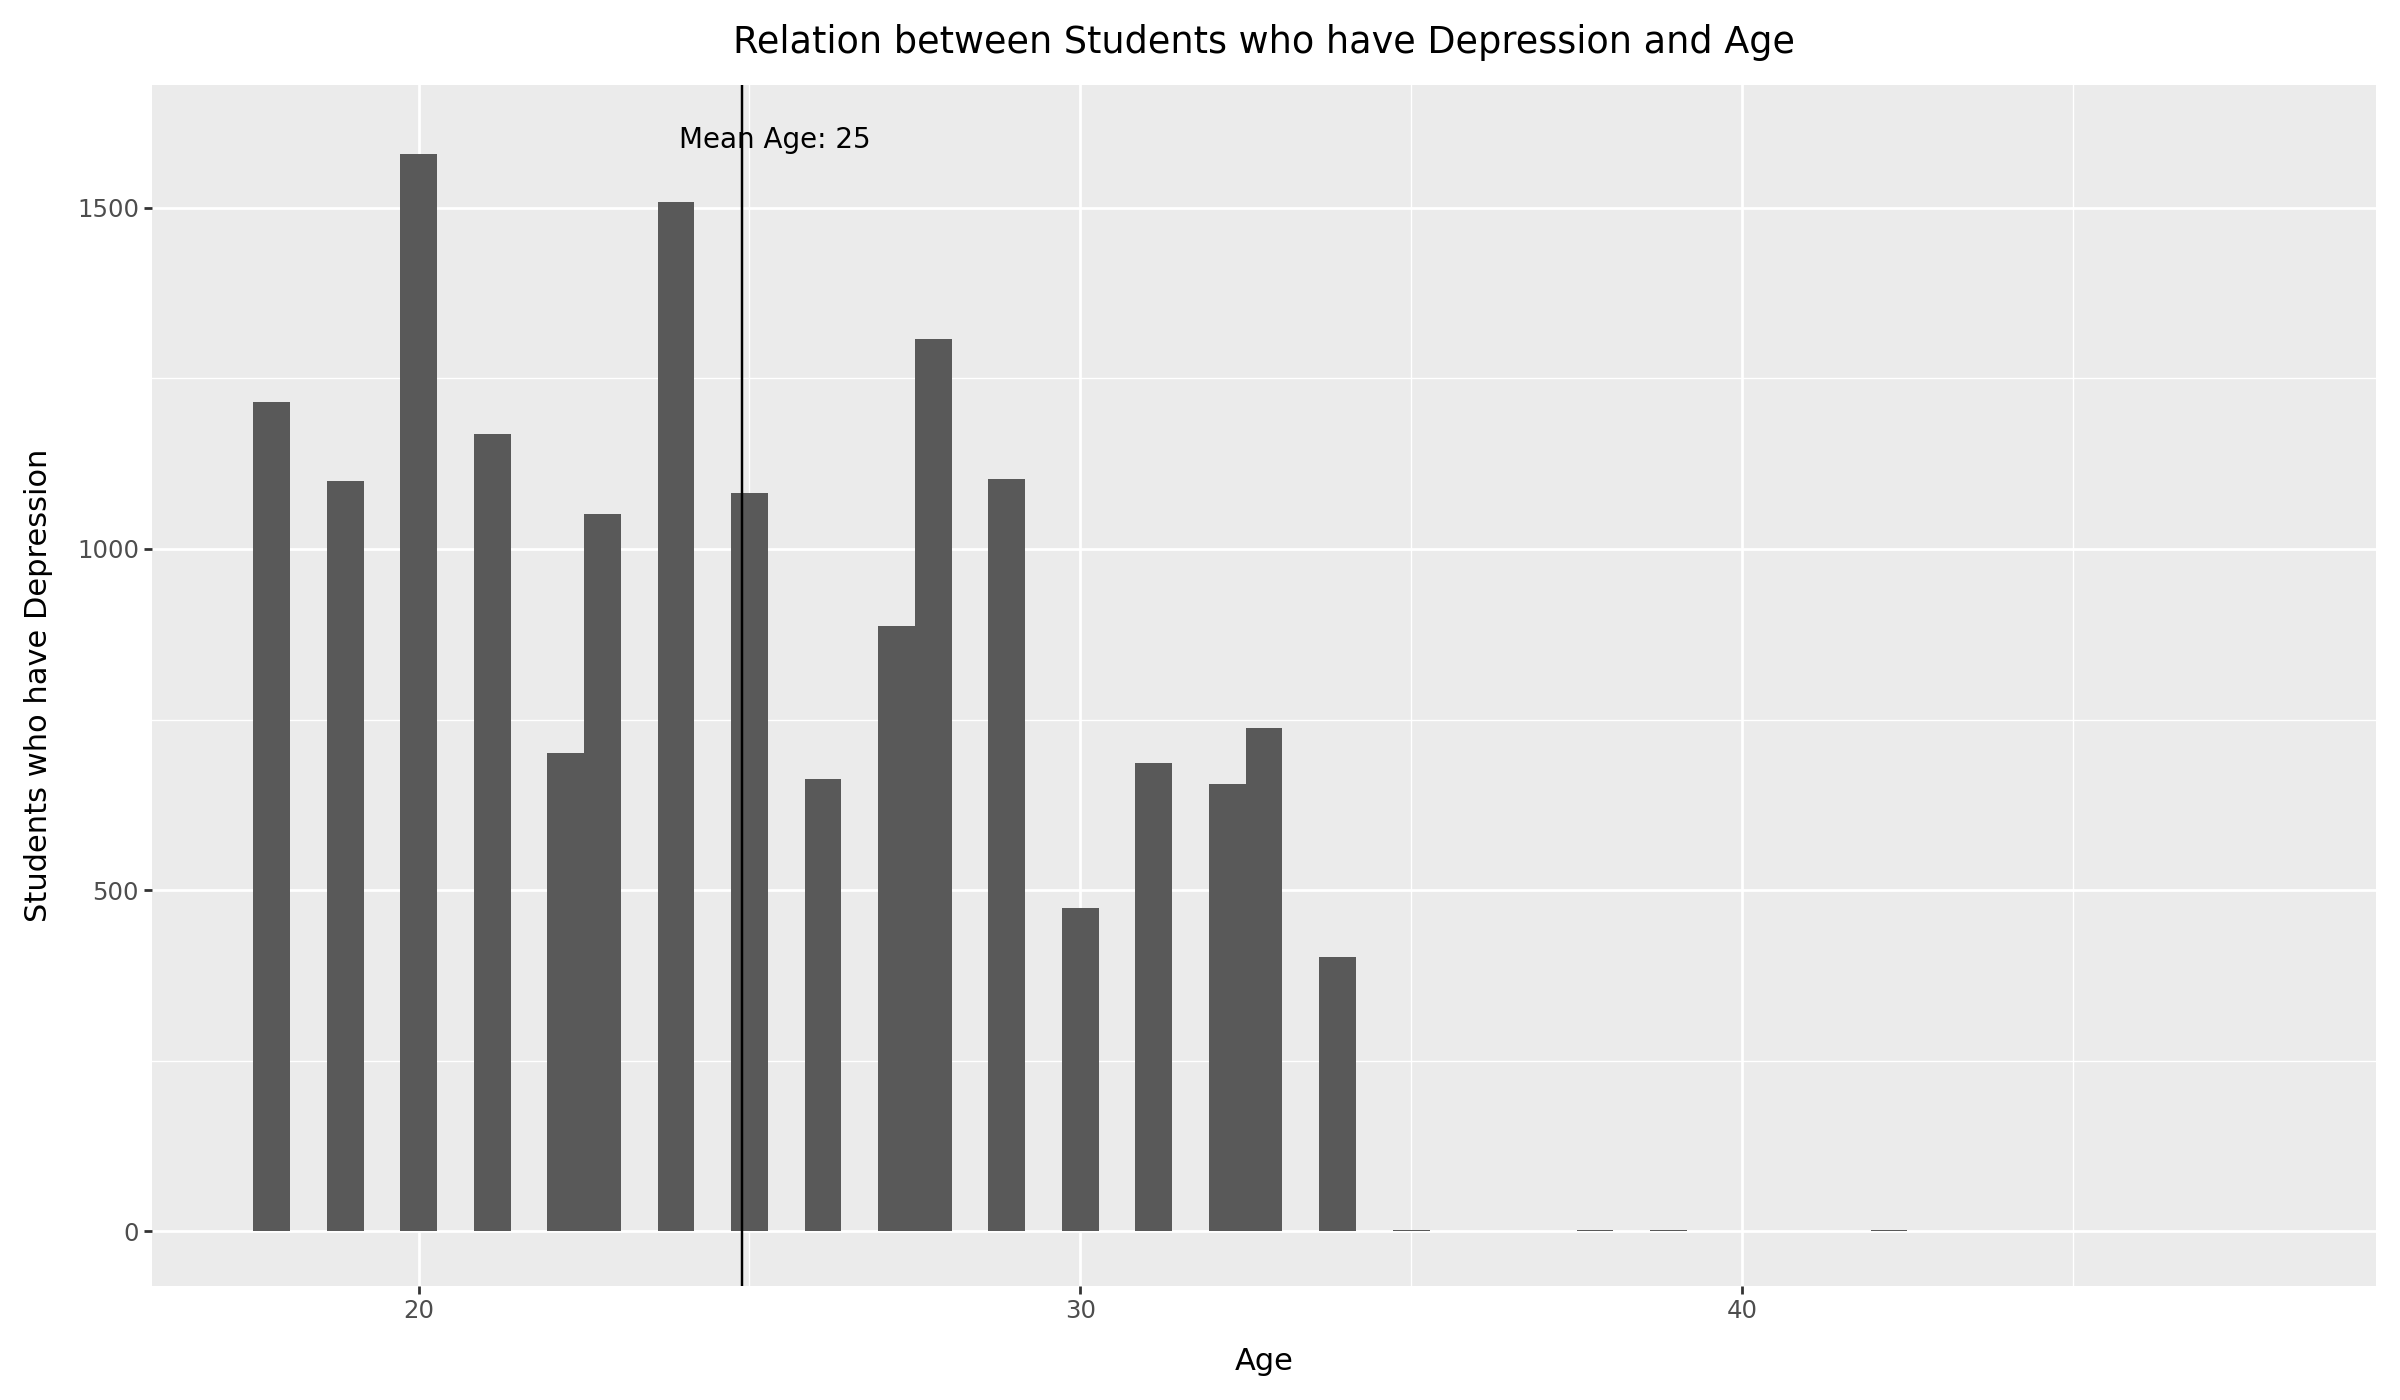

In [ ]:
mean_age = sum(is_depress['Age']) / len(is_depress['Age'])

age = (ggplot(is_depress, aes("Age")) + geom_histogram() +
      labs(y = "Students who have Depression", title = "Relation between Students who have Depression and Age") +
       geom_vline(xintercept= mean_age, linetype="solid", color="black")+
       annotate("text", x=mean_age + 0.5, y=1600, label=f"Mean Age: {mean_age:.0f}", color="Black", angle=360, size=10) +
      theme(figure_size=(12,7)))
age

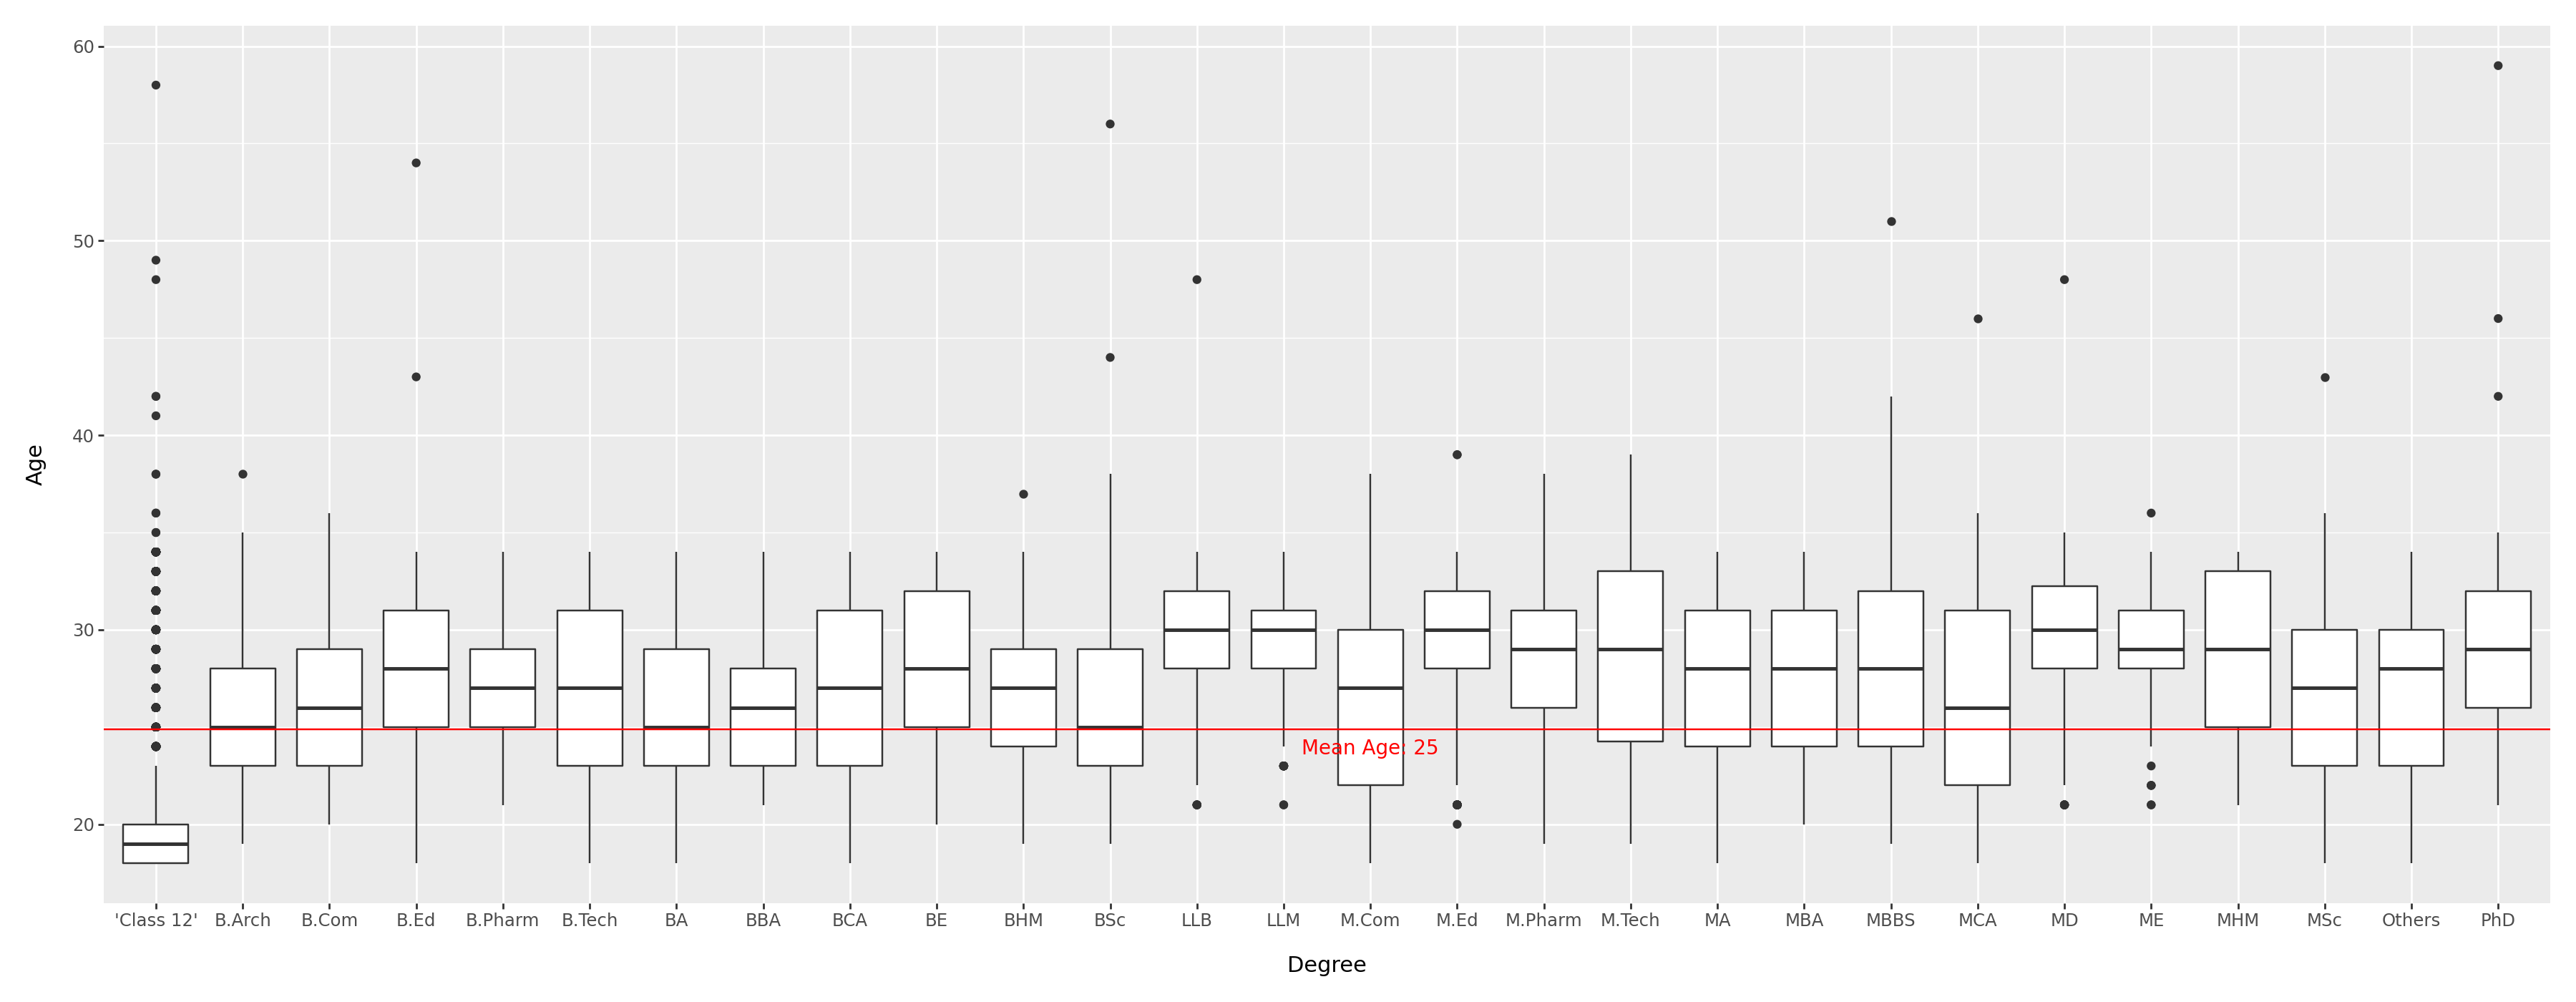

In [ ]:
age_n_degree = (ggplot(student_depression, aes(x = "Degree", y = "Age")) +
                geom_boxplot() +
                 geom_hline(yintercept= mean_age, linetype="solid", color="red")+
       annotate("text",x = 'M.Com', y=mean_age - 1, label=f"Mean Age: {mean_age:.0f}", color="red", angle=360, size=10) +
                theme(figure_size=(18,7)) )
age_n_degree

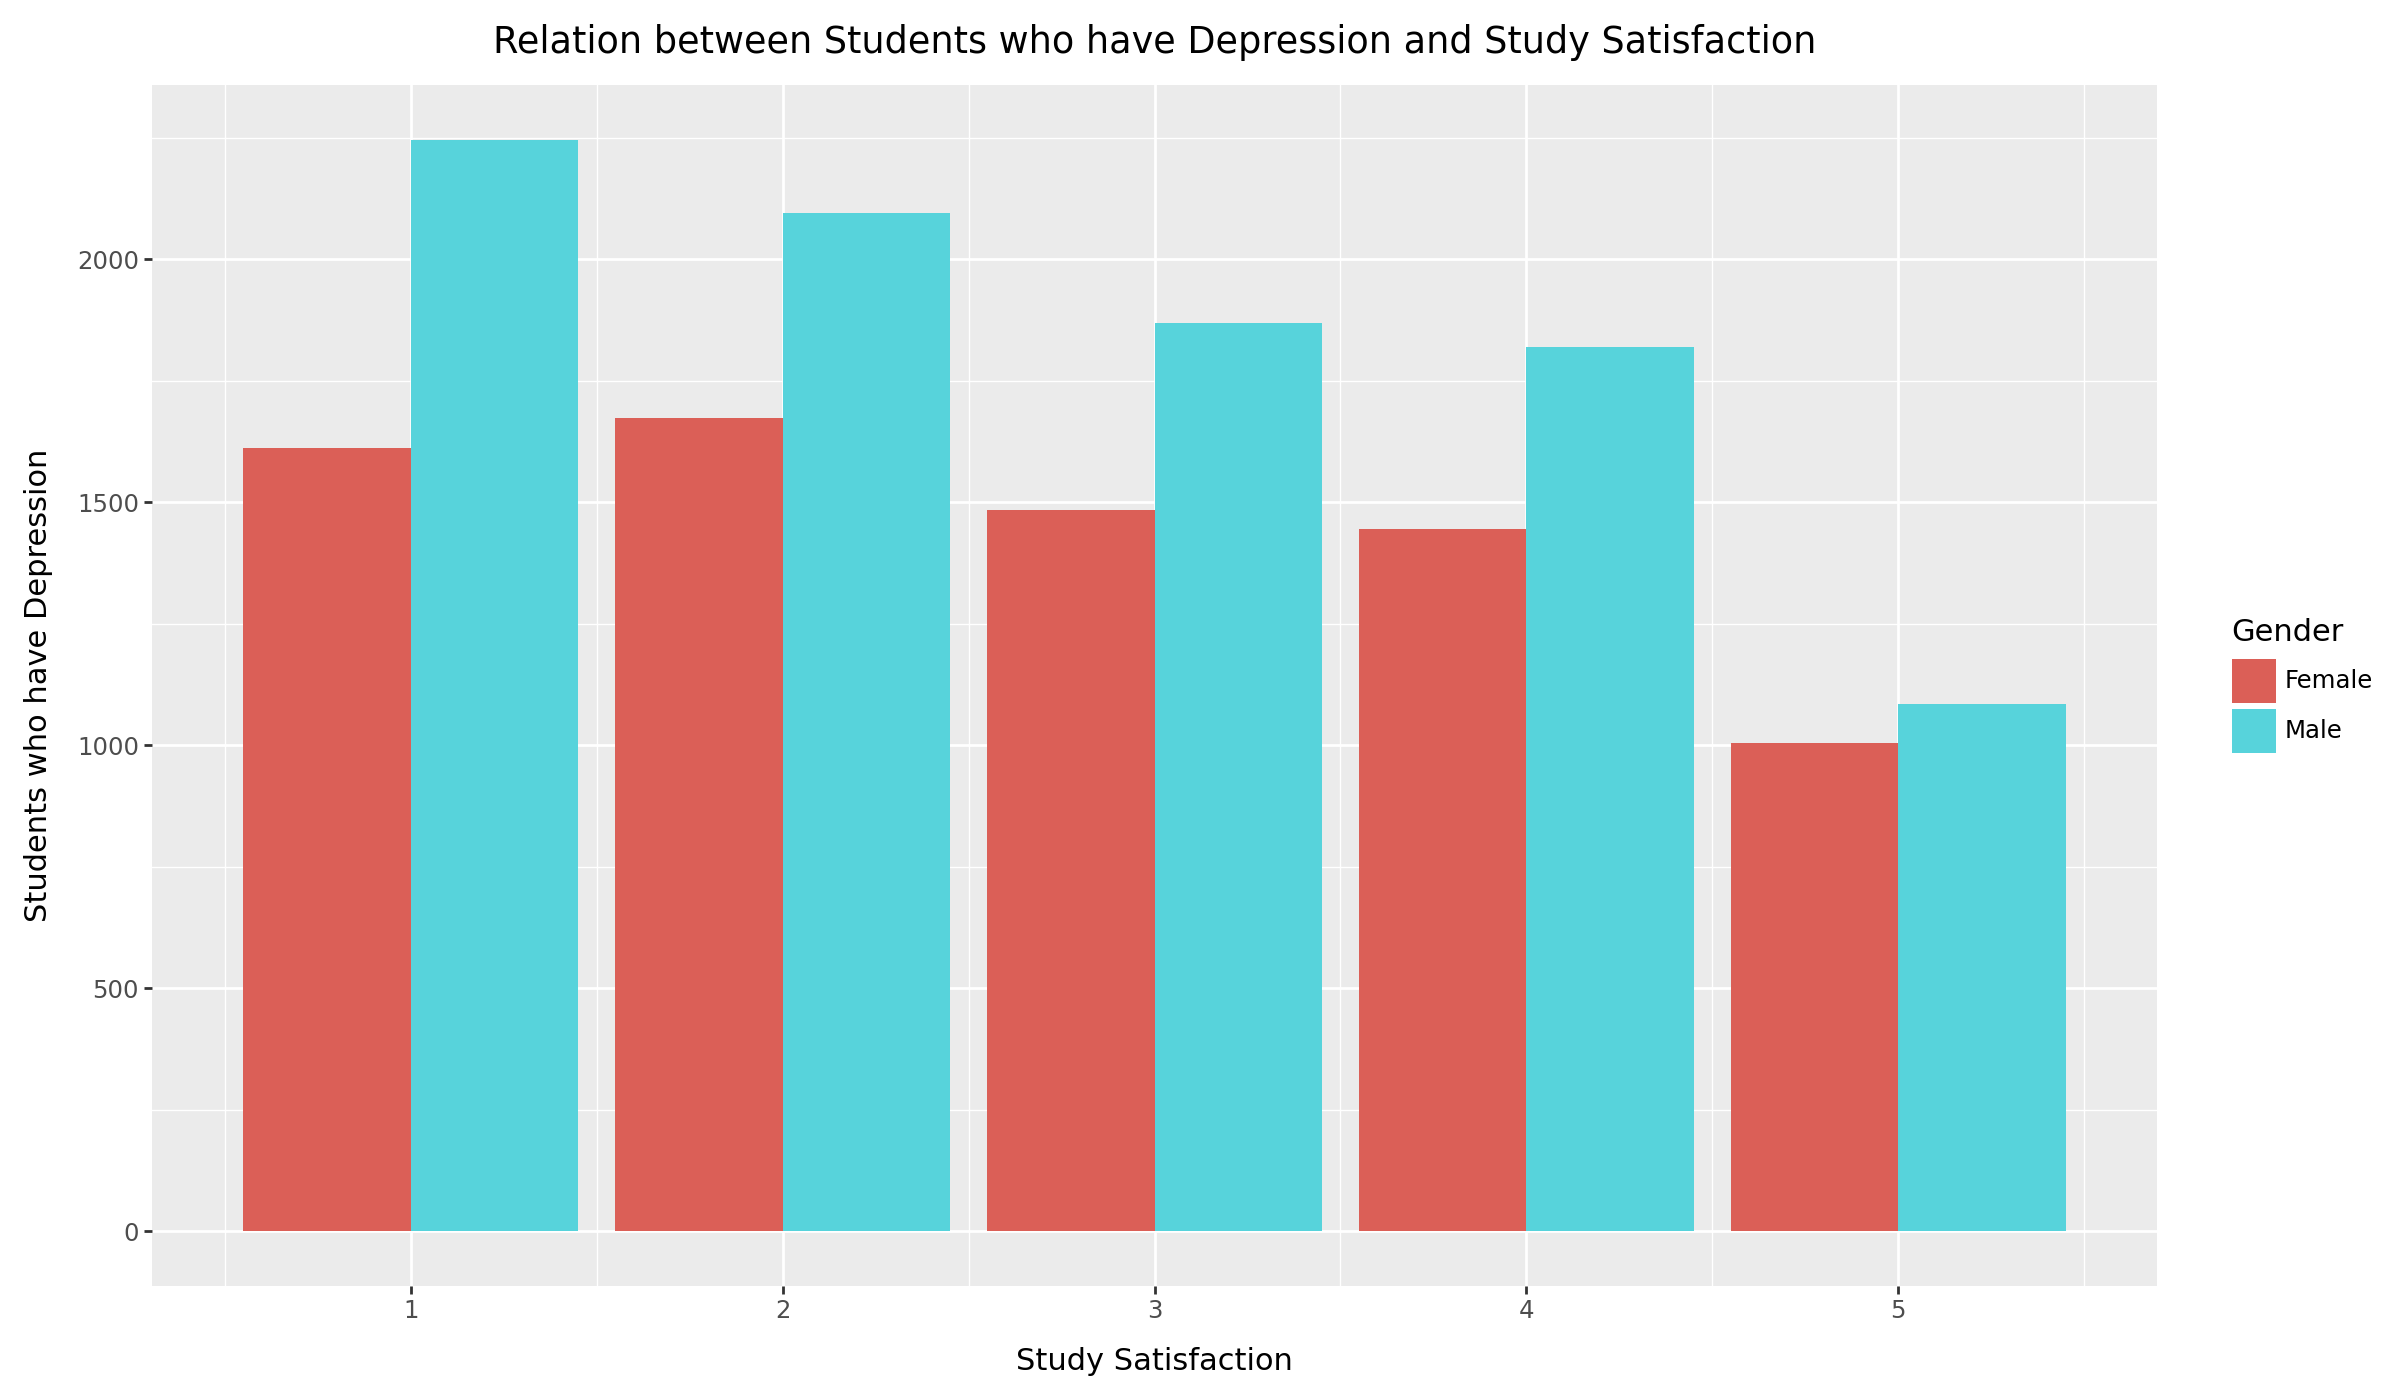

In [ ]:
score_study = is_depress[is_depress['Study Satisfaction'] != 0]

study_satis = (ggplot(score_study, aes("Study Satisfaction", fill = "Gender")) +
               geom_bar(position = 'dodge') +
               labs(y = "Students who have Depression", title = "Relation between Students who have Depression and Study Satisfaction") +
               theme(figure_size=(12,7)))
study_satis

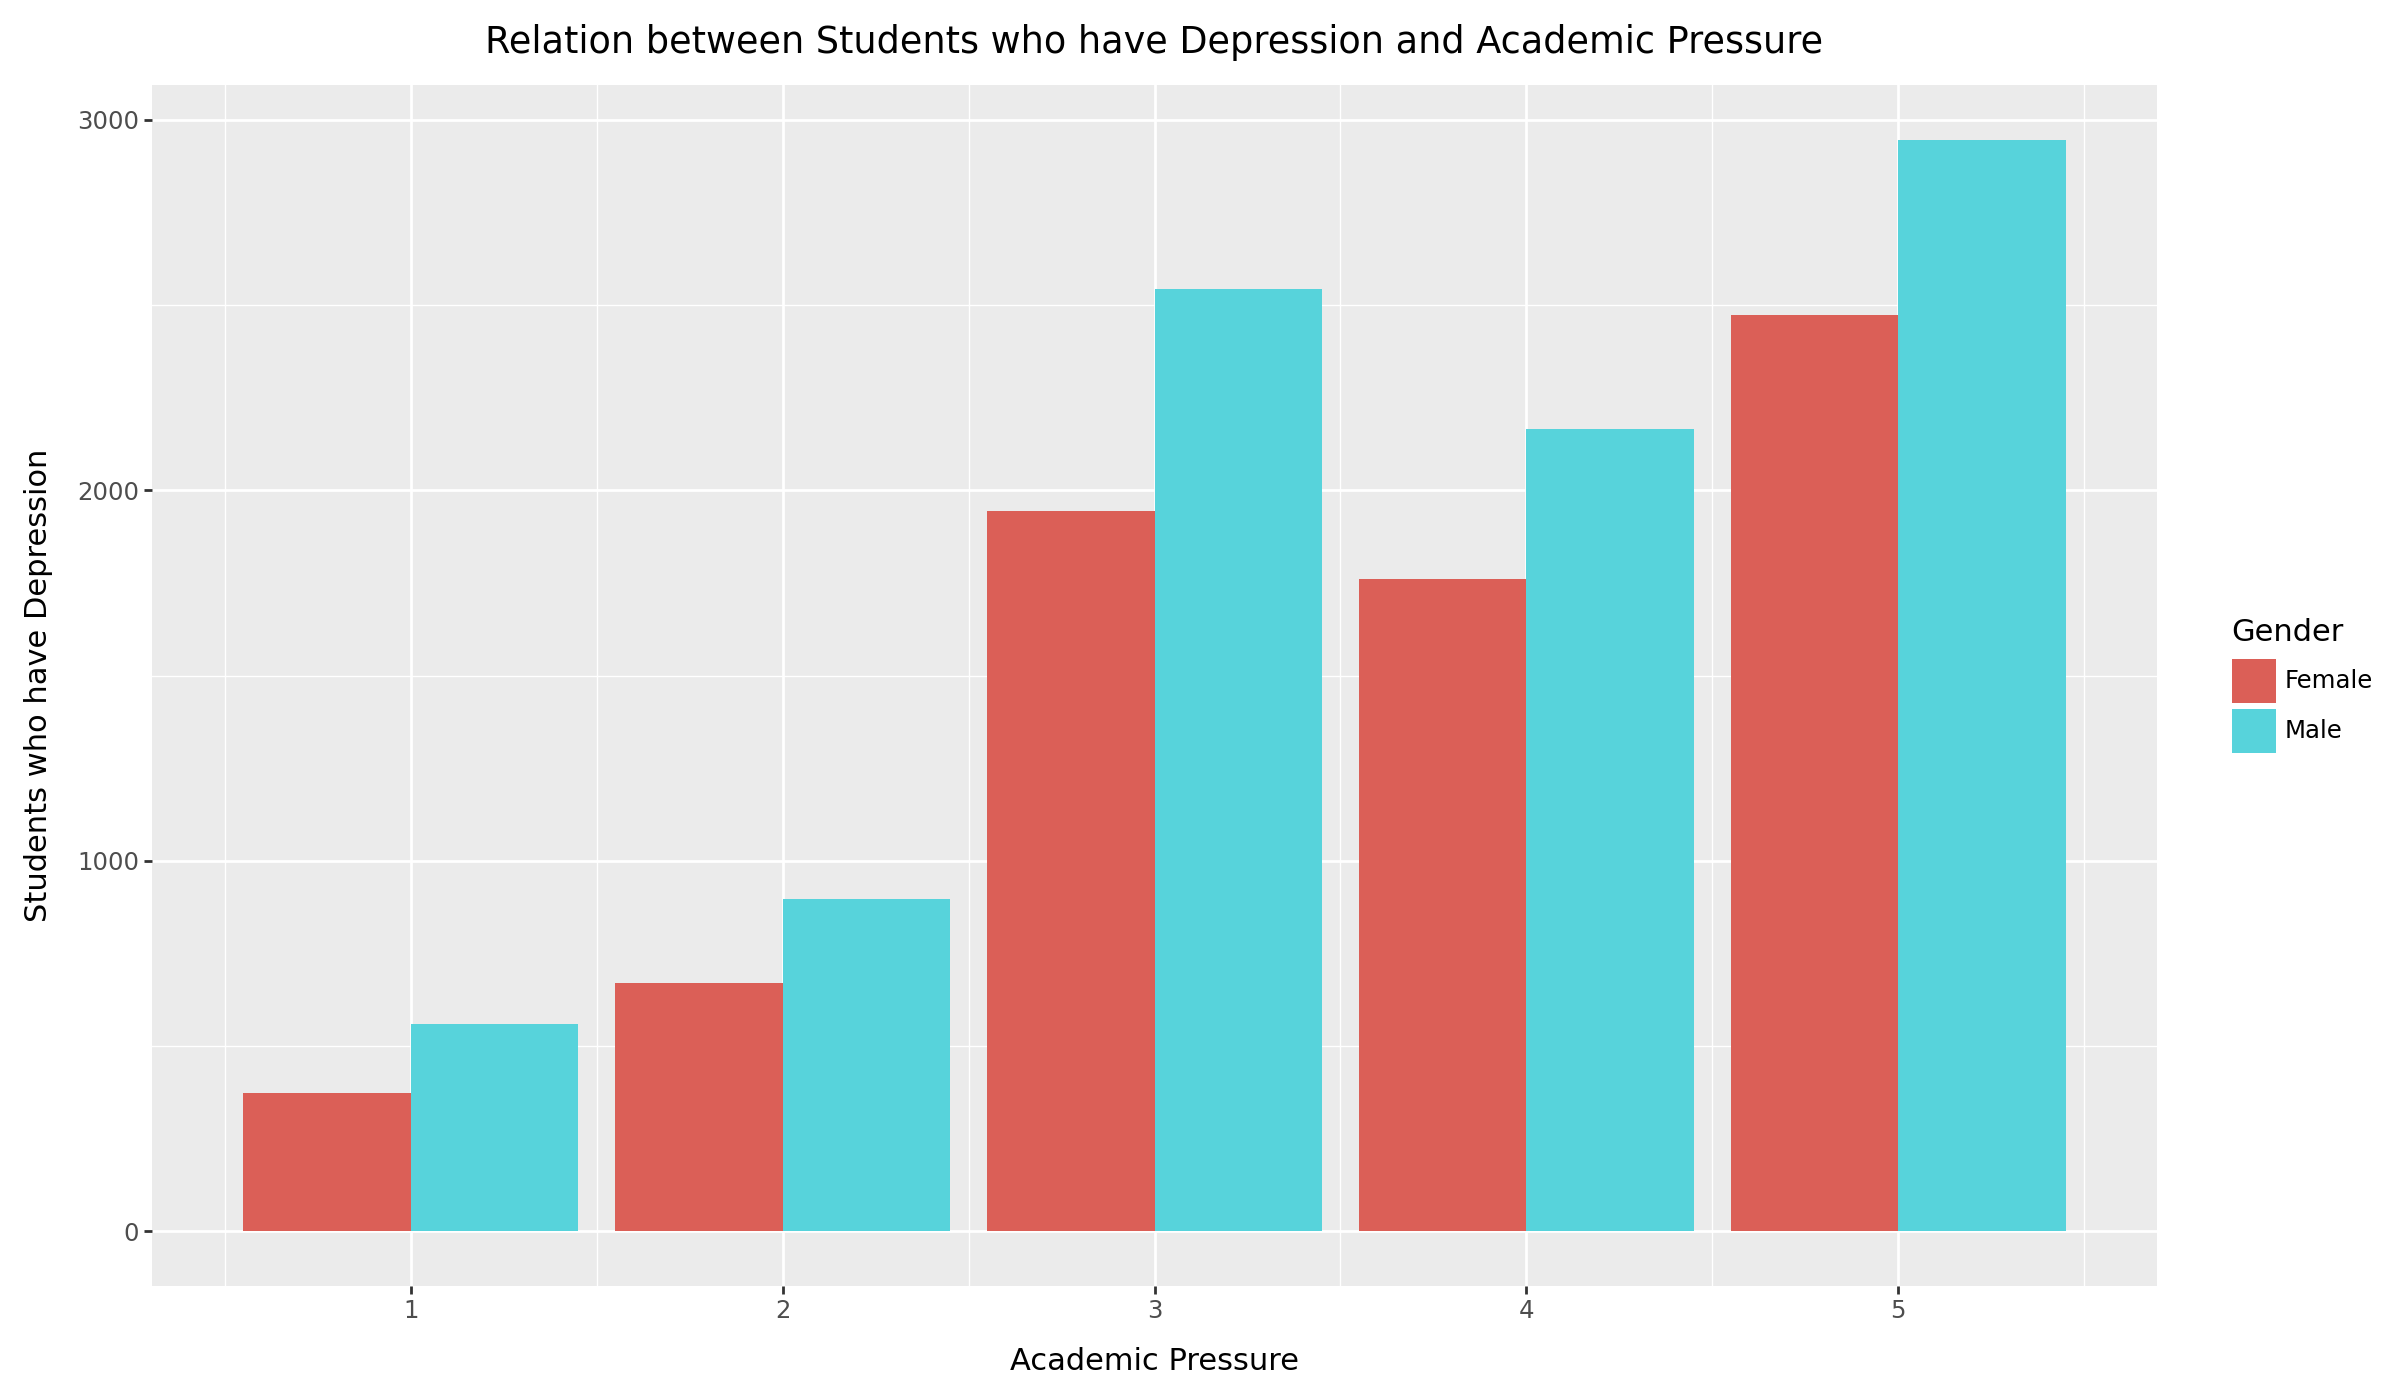

In [ ]:
academic_score = is_depress[is_depress['Academic Pressure'] != 0]
academic_pressure = (ggplot(academic_score, aes("Academic Pressure", fill = "Gender")) +
                     geom_bar(position = 'dodge') +
                     labs(y = "Students who have Depression", title = "Relation between Students who have Depression and Academic Pressure") +
                     theme(figure_size=(12,7)))
academic_pressure

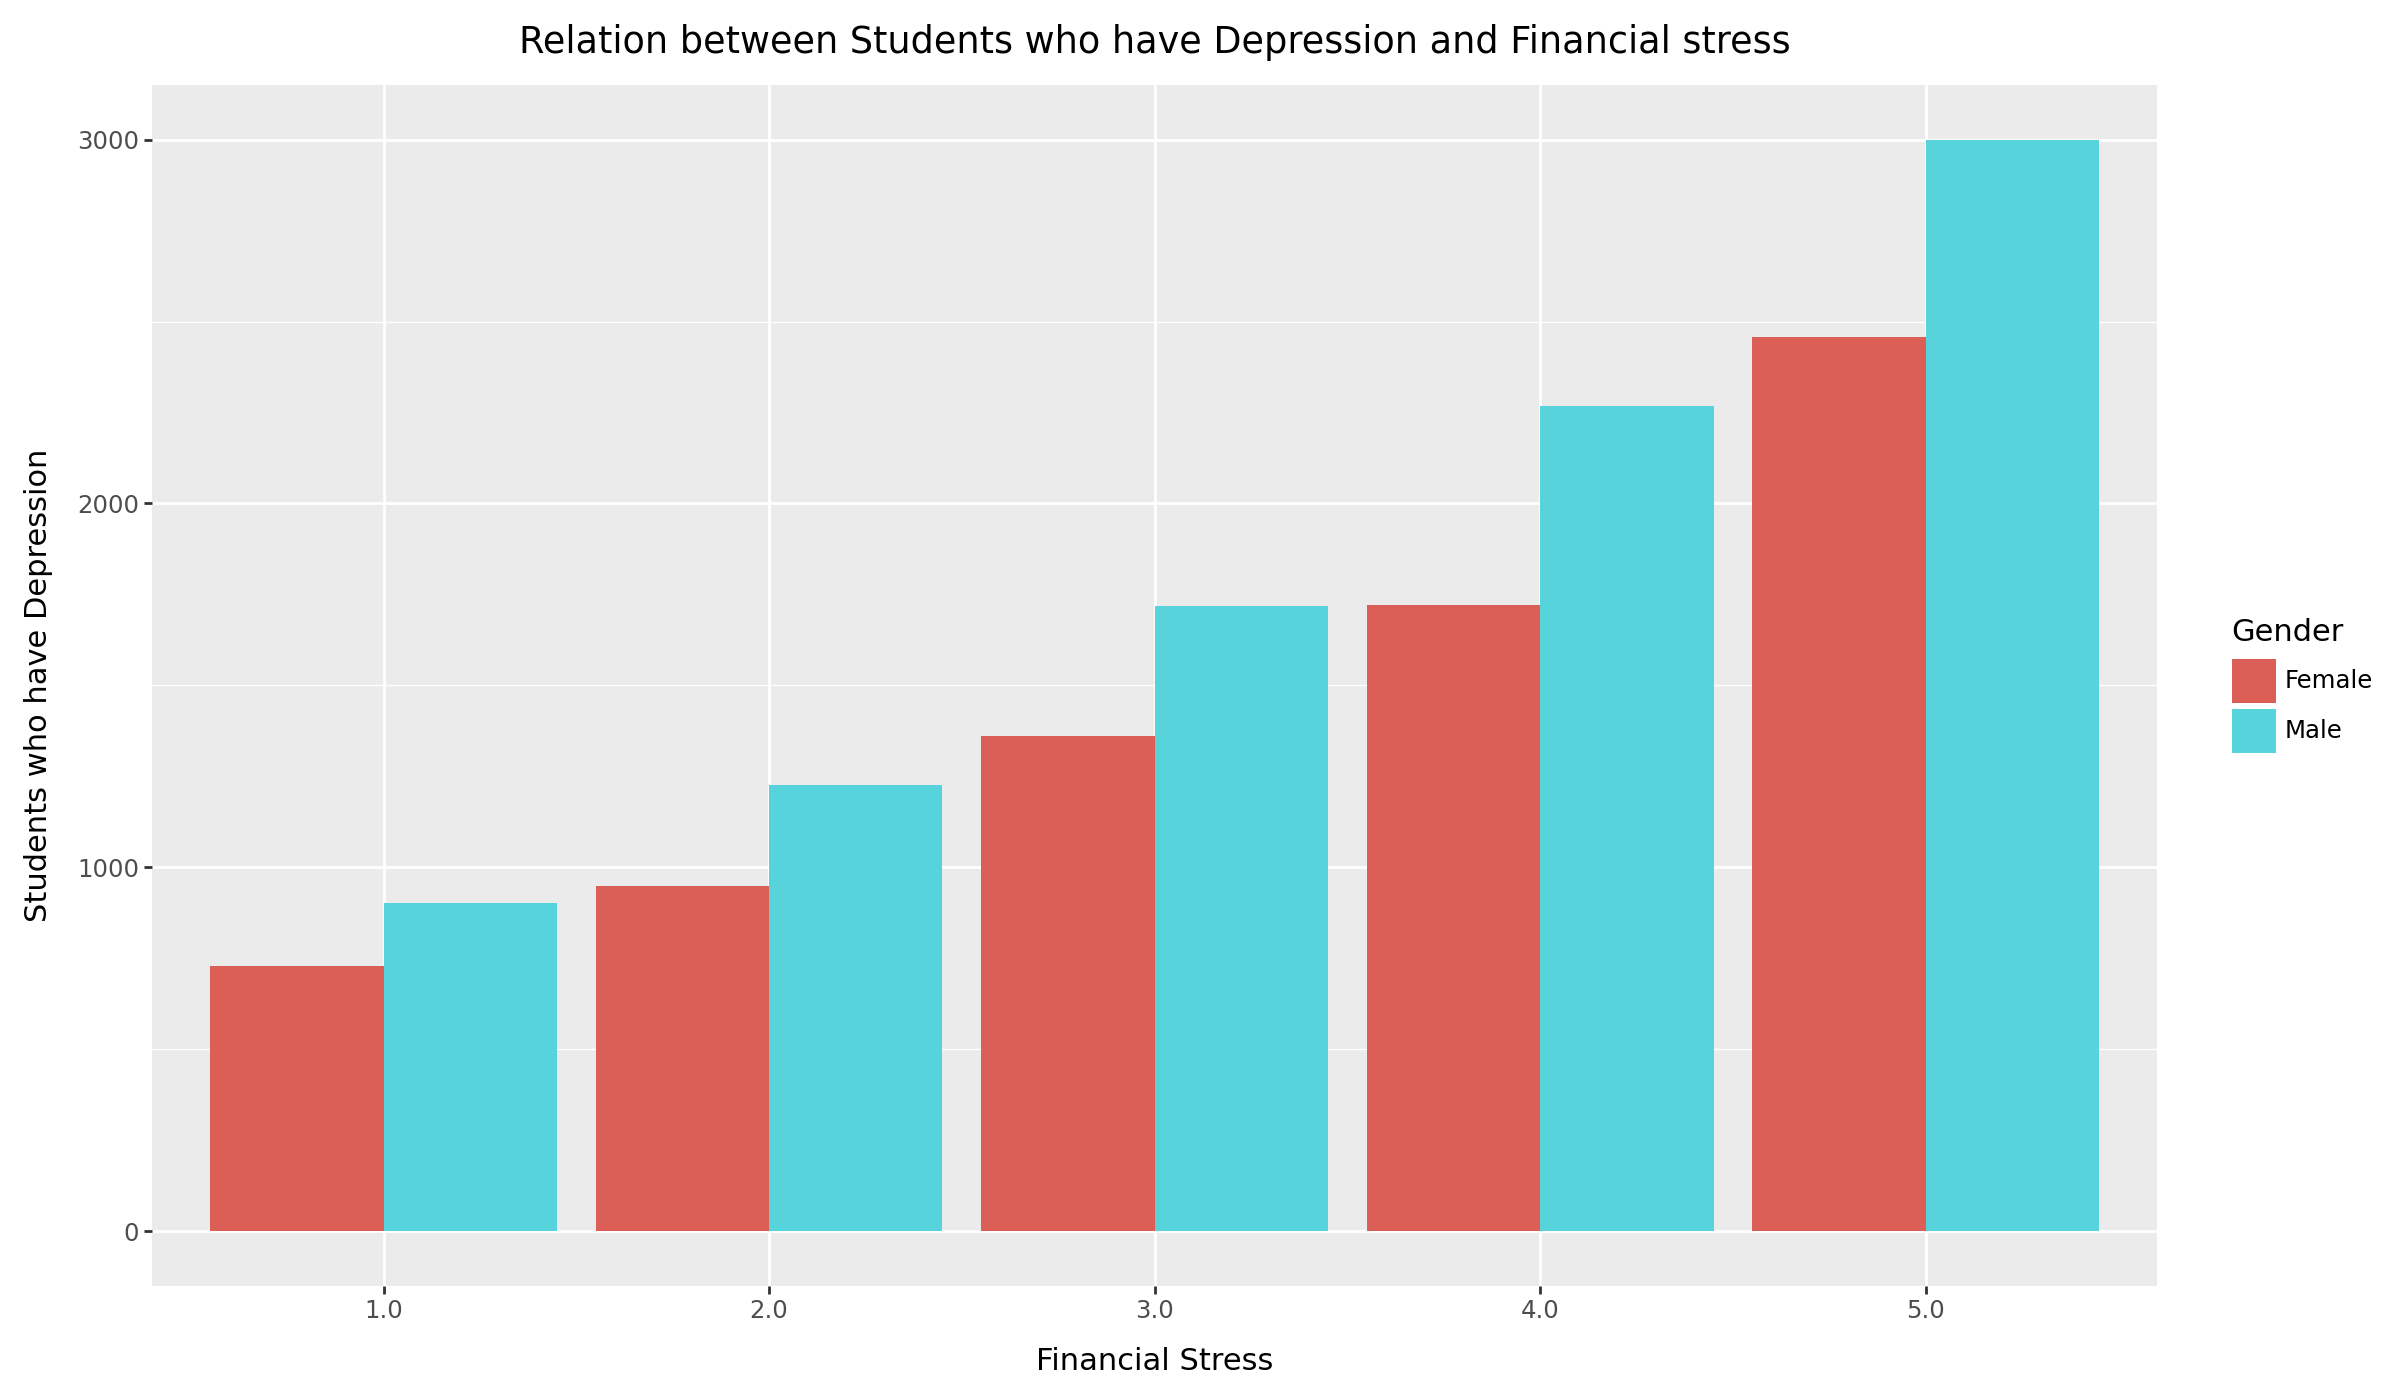

In [ ]:
delete_missing_data = is_depress[is_depress['Financial Stress'] != '?']
financial = (ggplot(delete_missing_data, aes("Financial Stress", fill = "Gender")) + geom_bar(position = 'dodge')  +
             labs(y = "Students who have Depression", title = "Relation between Students who have Depression and Financial stress") +
             theme(figure_size=(12,7)))
financial

<h2>Is Family Mental illness cause of depression in student? </h2>

In [ ]:
# student_depression = student_depression.rename({'Work/Study Hours' : 'Study_hours'}, axis=1)
student_depression = student_depression.rename({'Family History of Mental Illness' : 'fam_history_mental_ill'}, axis=1)
student_depression.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,fam_history_mental_ill,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,Yes
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,No
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,No
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,Yes
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,No


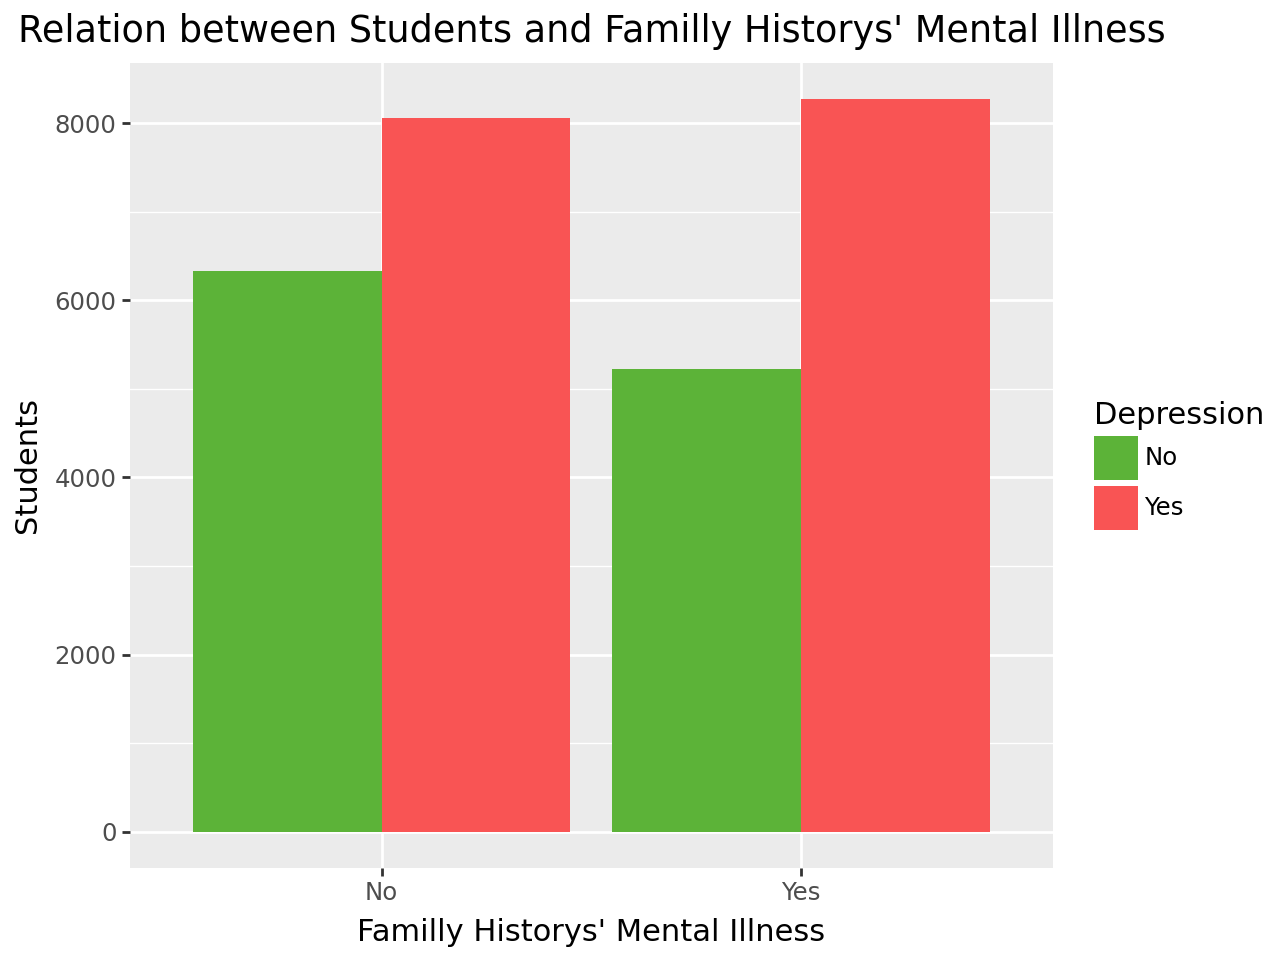

In [ ]:
student_depression.loc[student_depression['Depression'] == 1, 'Depression'] = 'Yes'
student_depression.loc[student_depression['Depression'] == 0, 'Depression'] = 'No'
relation_btw_fam_n_depress = (ggplot(student_depression, aes(x = 'fam_history_mental_ill', fill = 'Depression')) +geom_bar(position = "dodge") +
                              ylab('Students') +
                              xlab("Familly Historys' Mental Illness")  +
                              scale_fill_manual(values={'No': '#5CB338', 'Yes': '#F95454'})
                              + labs(title = "Relation between Students and Familly Historys' Mental Illness"))
relation_btw_fam_n_depress

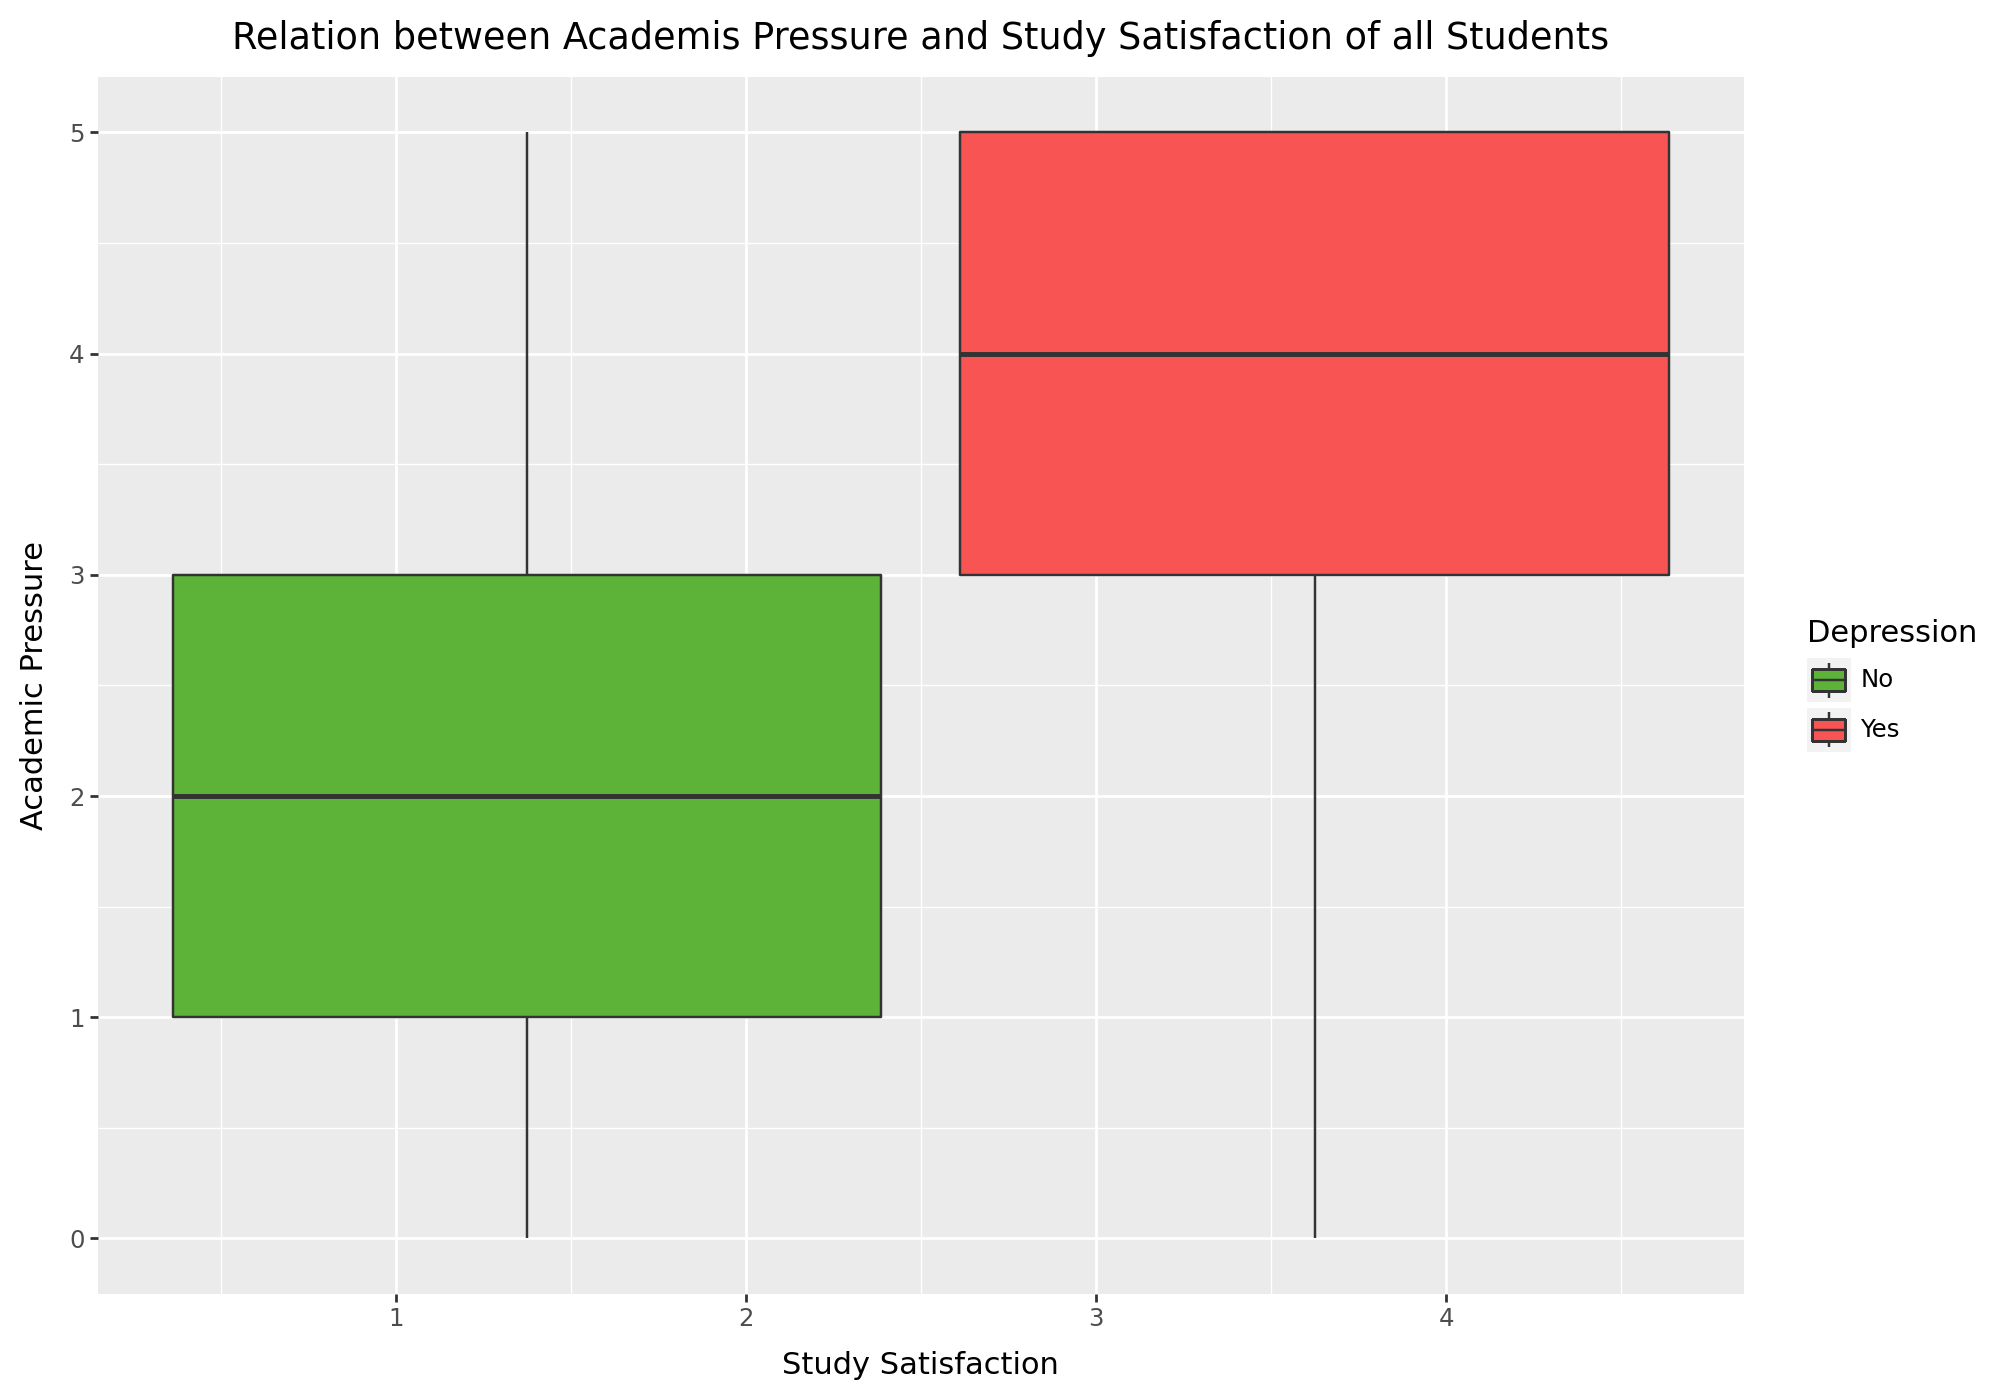

In [ ]:
academic_n_satifaction = (ggplot(student_depression, aes(x= "Study Satisfaction", y = "Academic Pressure", fill = "Depression")) +
                          geom_boxplot() +
                          theme(figure_size=(10,7)) +
                          scale_fill_manual(values={'No': '#5CB338', 'Yes': '#F95454'})
                          + labs(title = "Relation between Academis Pressure and Study Satisfaction of all Students"))
academic_n_satifaction

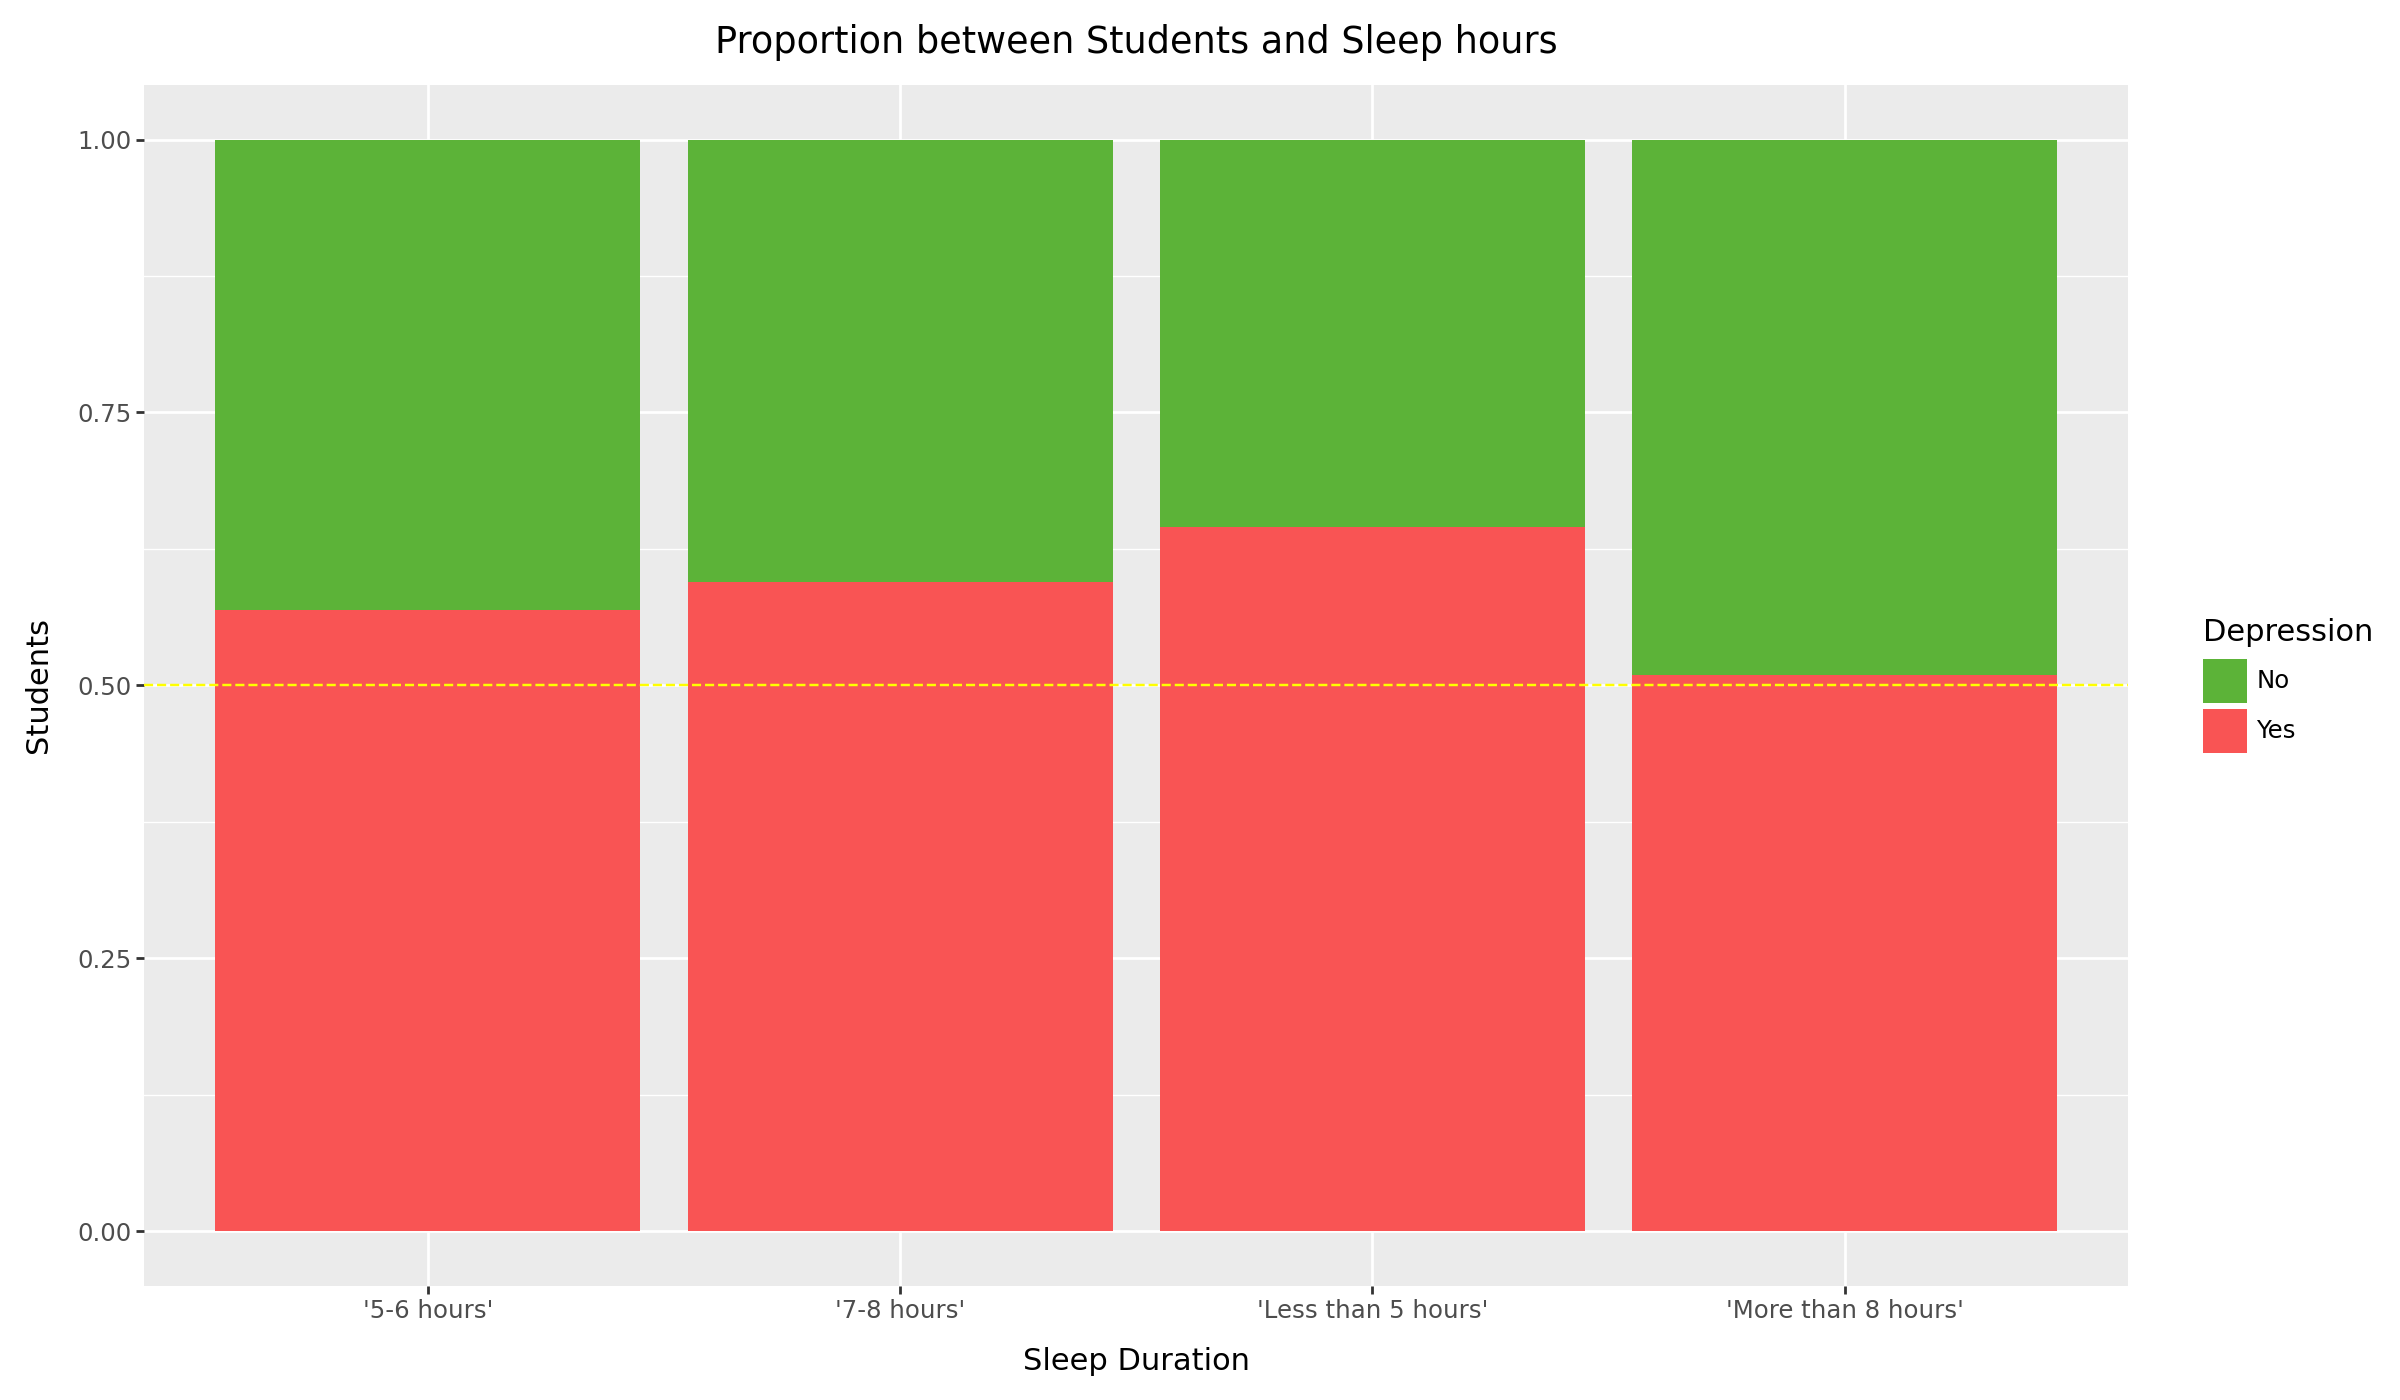

In [ ]:
sleep_hour_without_other = student_depression[student_depression['Sleep Duration'] != 'Others']
sleep_hours = (ggplot(sleep_hour_without_other, aes("Sleep Duration", fill = "Depression")) +
              geom_bar(position = 'fill') +
               scale_fill_manual(values=['#5CB338', '#F95454']) +
              theme(figure_size=(12,7))  +
                 geom_hline(yintercept=0.5, linetype="dashed", color="yellow") +
              labs(y = "Students", title = "Proportion between Students and Sleep hours"))
sleep_hours

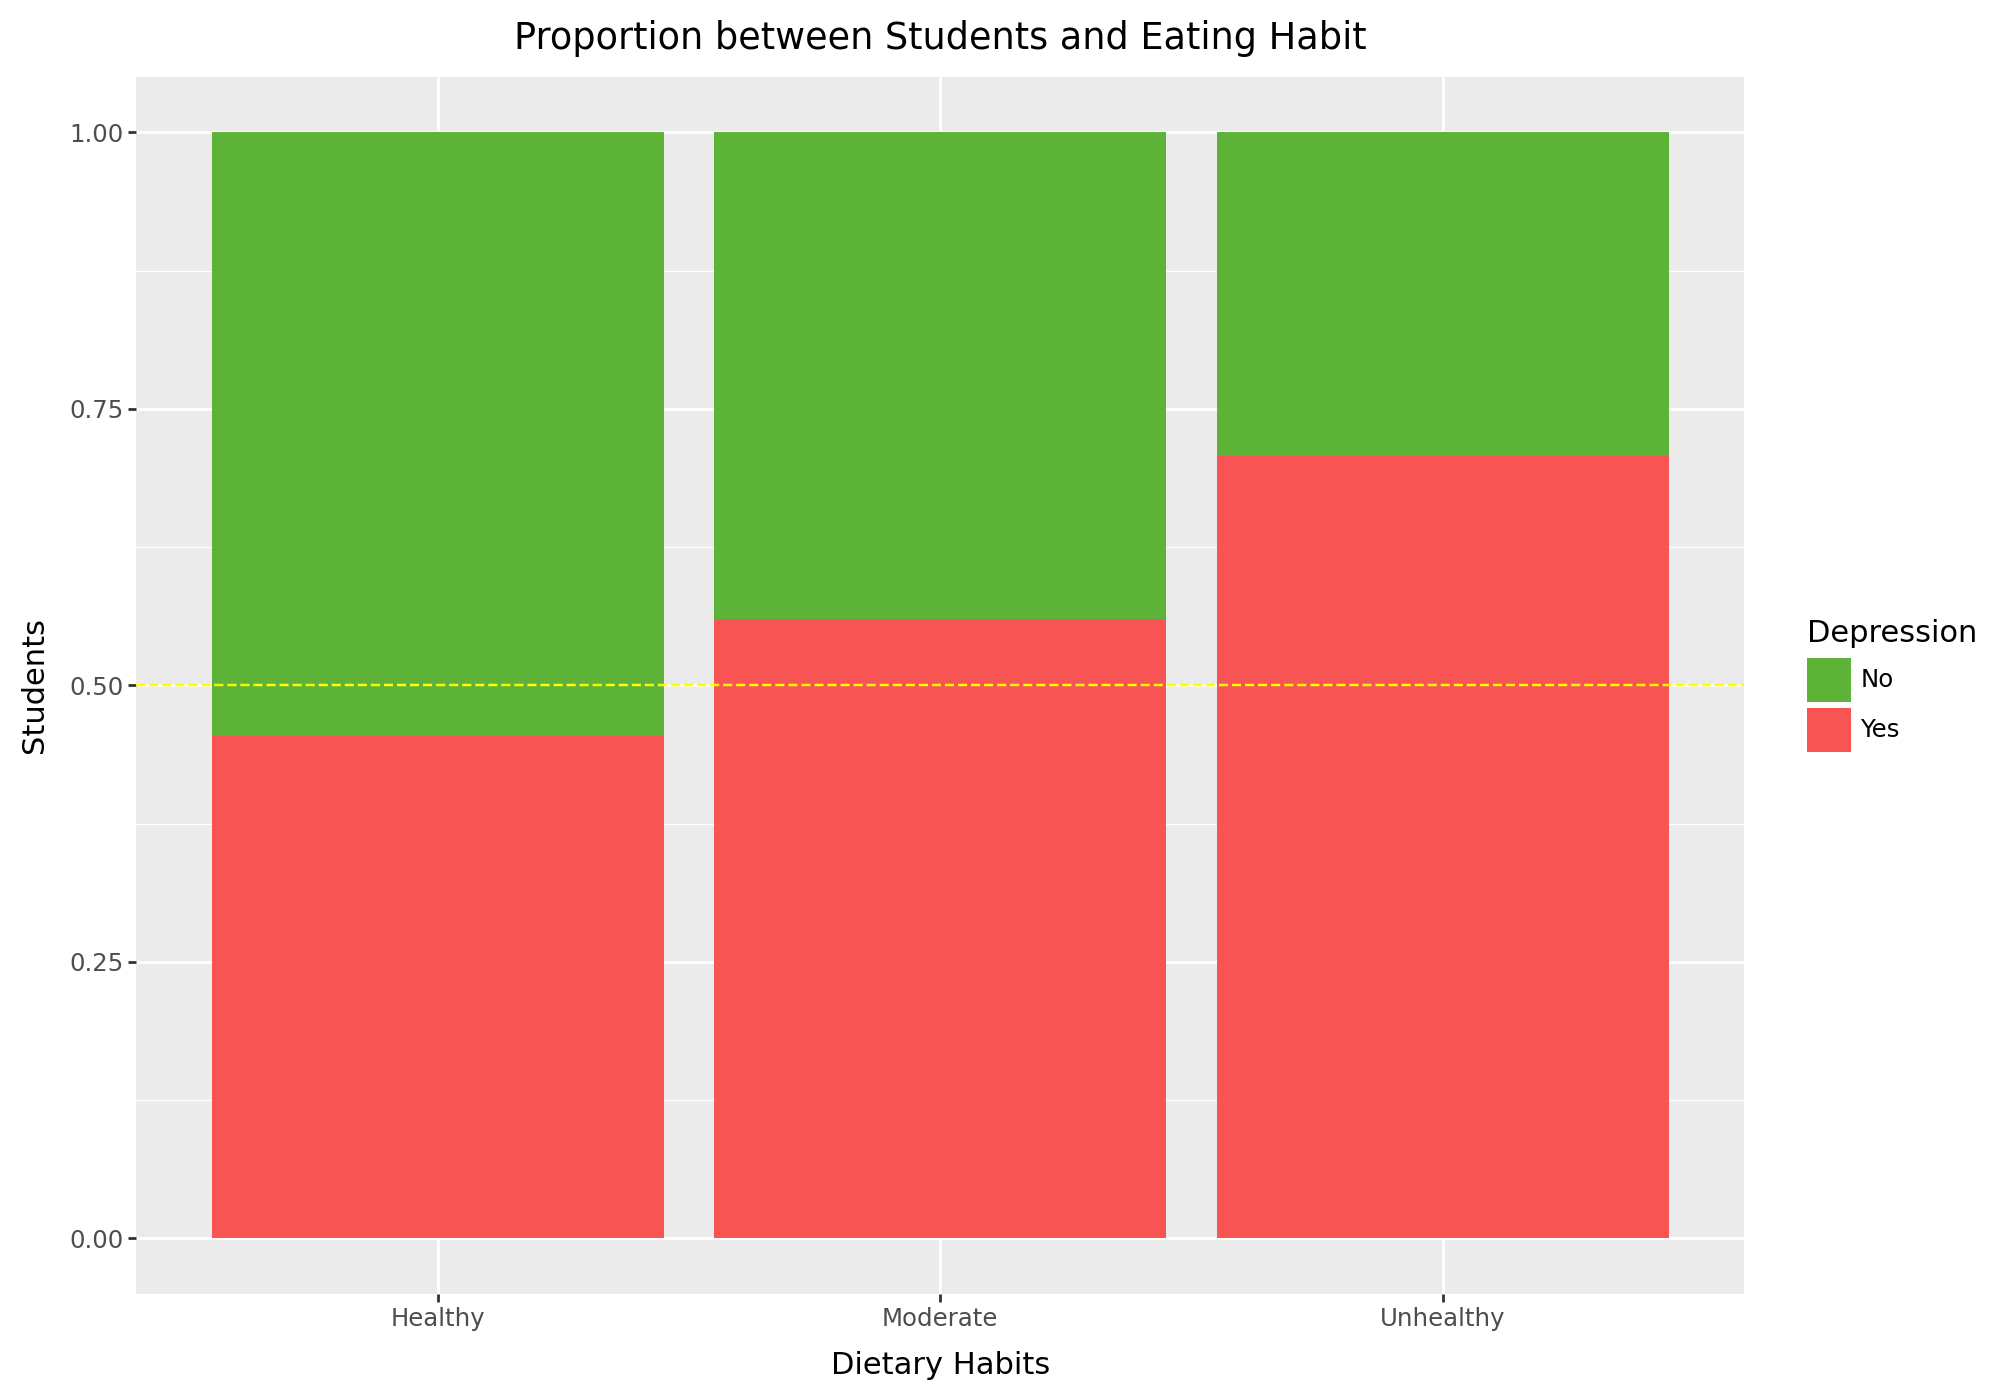

In [ ]:
cut_other = student_depression[student_depression['Dietary Habits'] != 'Others']

eating_habit = (ggplot(cut_other, aes("Dietary Habits", fill = 'Depression')) + geom_bar(position = 'fill') +
                scale_fill_manual(values=['#5CB338', '#F95454']) +
                labs(y = "Students", title = "Proportion between Students and Eating Habit") +
                  geom_hline(yintercept=0.5, linetype="dashed", color="yellow")+
                theme(figure_size= (10, 7)))
eating_habit

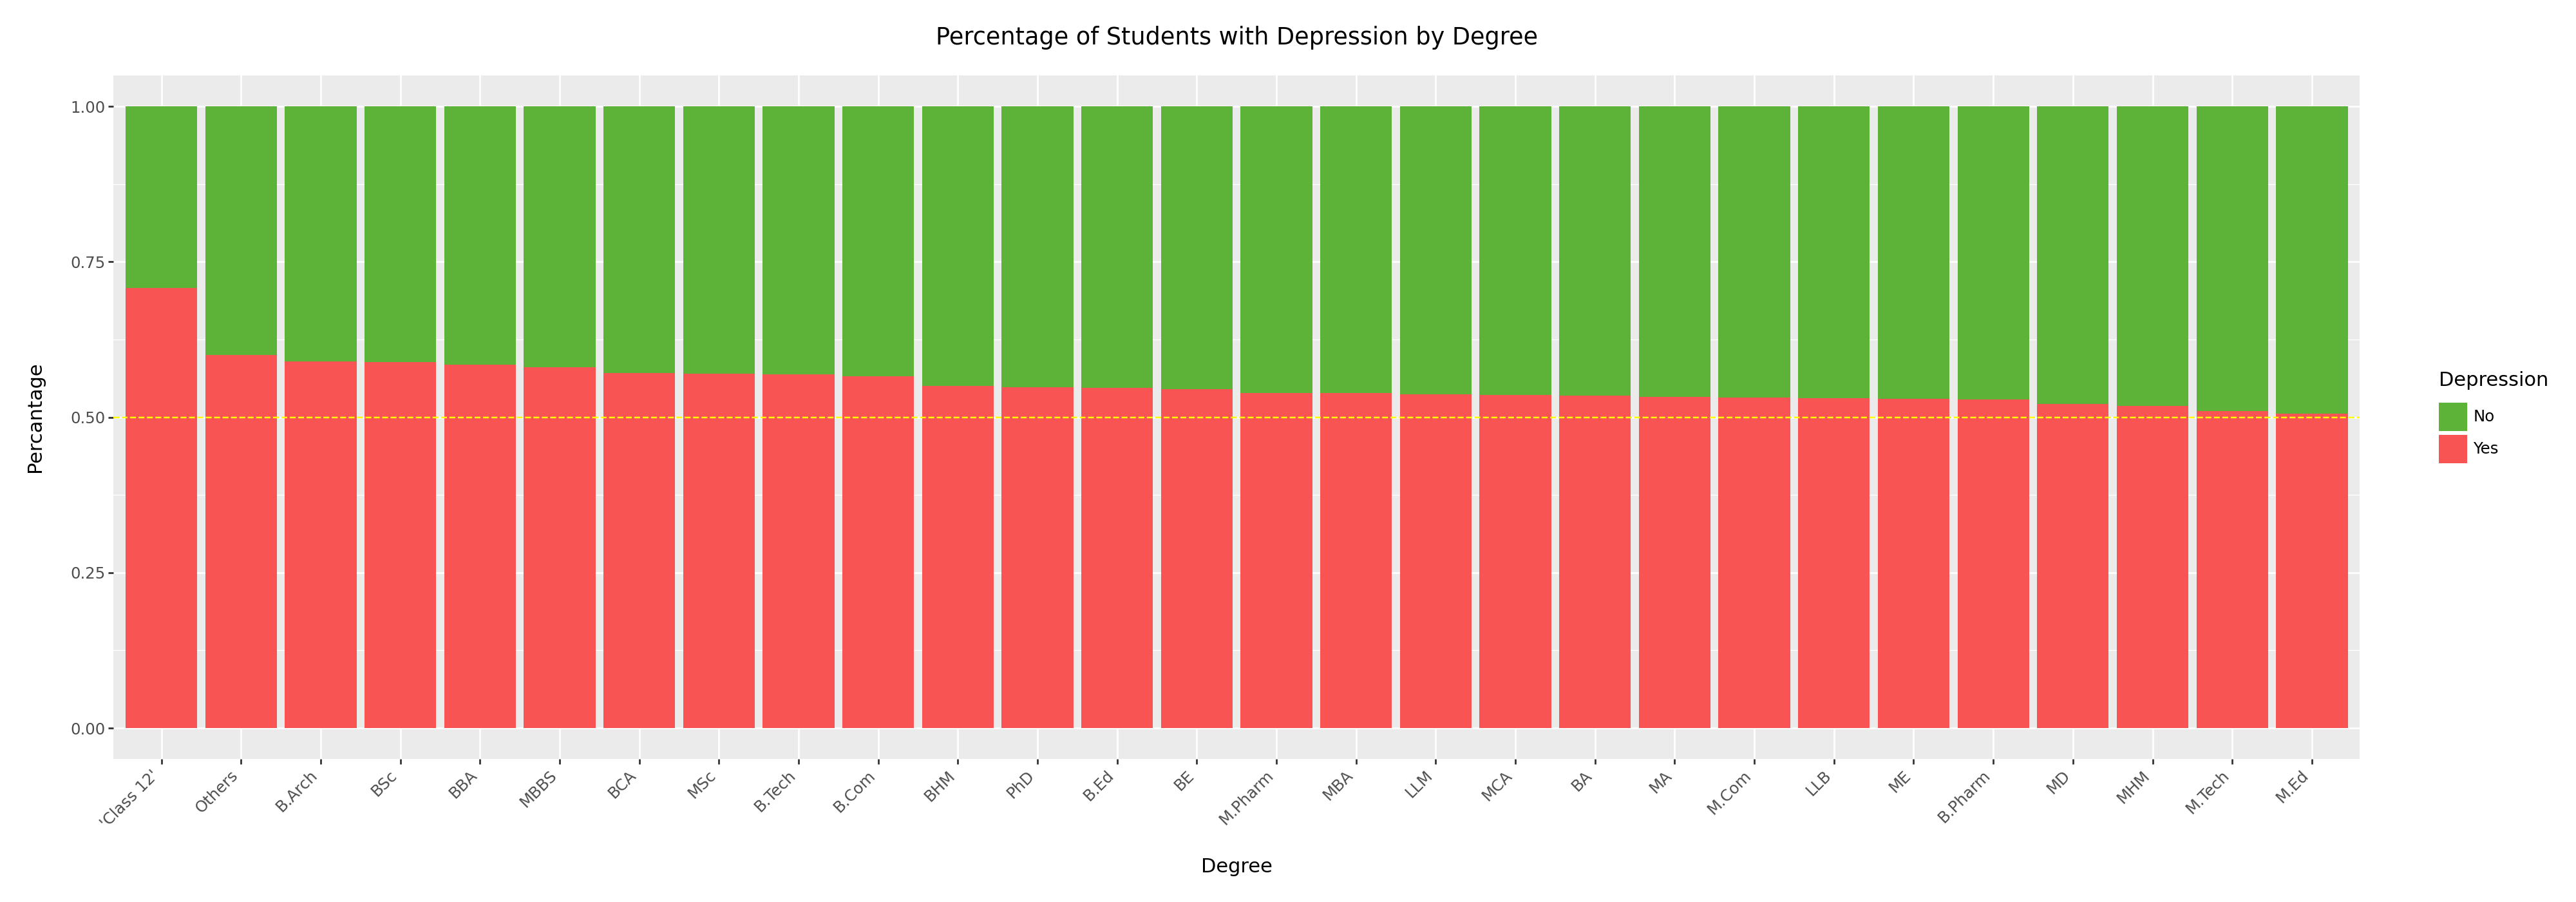

In [ ]:
degree_order = (
    student_depression.groupby('Degree')['Depression']
    .apply(lambda x: (x == 'Yes').mean())
    .sort_values(ascending=False)
    .index
)

student_depression['Degree'] = pd.Categorical(
    student_depression['Degree'],
    categories=degree_order,
    ordered=True
)

depress_n_degree = (
    ggplot(student_depression, aes(x="Degree", fill="Depression")) +
    geom_bar(position="fill") +
    scale_fill_manual(values={'No': '#5CB338', 'Yes': '#F95454'}) +
    labs(
        title="Percentage of Students with Depression by Degree",
        x="Degree",
        y="Percantage",
        fill="Depression"
    ) +
    theme(
        figure_size=(20, 7),
        axis_text_x=element_text(rotation=45, hjust=1),
        legend_position='right'
    ) +
    geom_hline(yintercept=0.5, linetype="dashed", color="yellow")
)
depress_n_degree

<h2>Can we predict whether depression is caused by eating habits, age, or education level? (Using Logistic Regression)</h2>

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
student_depression.loc[student_depression['Depression'] == 'Yes', 'Depression'] = 1
student_depression.loc[student_depression['Depression'] == 'No', 'Depression'] = 0
student_depression

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [ ]:
# use column Depression: if 0 is not depression, 1 is depression

# Visualize Dietary Habits
student_depression = student_depression[student_depression['Dietary Habits'] != 'Others']

# Convert "Dietary Habits" to number
mapping = {"Healthy": 2, "Moderate":1, "Unhealthy":0}
student_depression['Dietary Habits'] = student_depression['Dietary Habits'].map(mapping)

# Create a new column for one-hot encoding of Degree
student_depression = pd.get_dummies(student_depression, columns=['Degree'])

# Create X and y dataframe
degree_columns = [col for col in student_depression.columns if col.startswith("Degree")]
feature_columns = ['Age', 'Dietary Habits'] + degree_columns

X = student_depression[feature_columns]
y = student_depression['Depression']

# Create training and testing data using train_test_split. 80% training and 20% testing, random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X_train

<ipython-input-13-9c5ffef316ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Dietary Habits,Degree_'Class 12',Degree_B.Arch,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
7956,21.0,0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6741,27.0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16271,32.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8450,23.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
21658,28.0,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,23.0,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24434,28.0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
14154,27.0,2,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23330,20.0,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Declare the models

models = {
        'Logistic L2 C=1': LogisticRegression(penalty='l2', C=1, random_state=100),
        'Logistic L2 C=0 .1' : LogisticRegression(penalty='l2', C=0.1, random_state=100),
        'Logistic L1 C=1' : LogisticRegression(penalty='l1', C=1, random_state=100, solver = 'liblinear'),
        'Logistic L1 C=0.1' : LogisticRegression(penalty='l1', C=0.1, random_state=100, solver = 'liblinear'),
}

# Use cross validation to find the best model. (5 Folds)
cv_results = []

for model_name, model in models.items():
  # standardize the data.
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model)
  ])
  cv_scores = cross_val_score(estimator = pipeline,
                                X = X_train,
                                y = y_train,
                                cv = 5,
                                scoring='accuracy')
  cv_results.append({
         'Model': model_name,
         'Accuracy': cv_scores.mean(),
  })

cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)

                Model  Accuracy
0     Logistic L2 C=1  0.644212
1  Logistic L2 C=0 .1  0.644212
2     Logistic L1 C=1  0.643987
3   Logistic L1 C=0.1  0.644436


In [ ]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the best model on the whole training set
best_model = models['Logistic L1 C=0.1']
best_model.fit(X_train_scaled, y_train)

# Test the final model on the test set. Report accuracy and confusion matrix.
y_pred = best_model.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6471853711007529
              precision    recall  f1-score   support

           0       0.60      0.41      0.49      2291
           1       0.66      0.81      0.73      3287

    accuracy                           0.65      5578
   macro avg       0.63      0.61      0.61      5578
weighted avg       0.64      0.65      0.63      5578

[[ 947 1344]
 [ 624 2663]]


TN (True Negative) = 947 (ทำนายว่าไม่มีภาวะซึมเศร้าและไม่มีภาวะซึมเศร้าจริงๆ)

FP (False Positive) = 1344 (ทำนายว่าไม่มีภาวะซึมเศร้าแต่ว่ามีภาวะซึมเศร้า)

FN (False Negative) = 624 (ทำนายว่ามีภาวะซึมเศร้าแต่ว่าไม่มีภาวะซึมเศร้า)

TP (True Positive) = 2663 (ทำนายว่ามีภาวะซึมเศร้าและมีภาวะซึมเศร้าจริงๆ)



<h2>**Make Prediction to Plot** </h2>

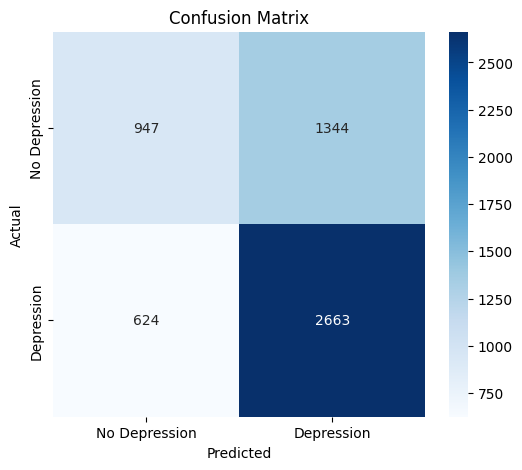

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['No Depression', 'Depression']

#  heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names


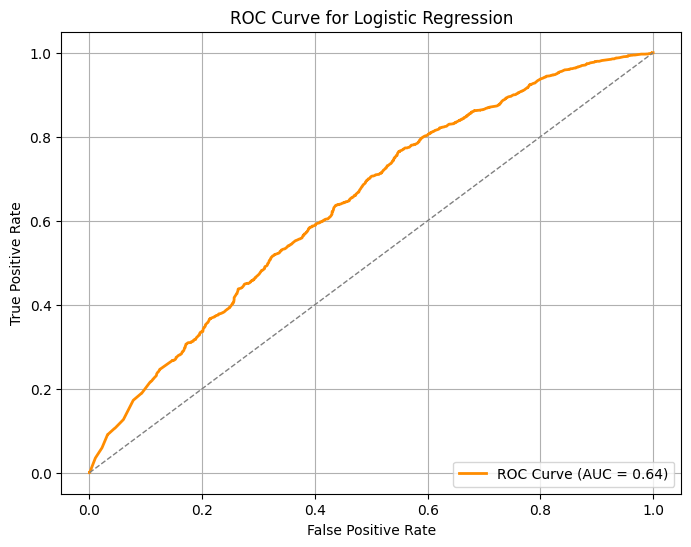

In [ ]:
y_prob = best_model.predict_proba(X_test)[:, 1]

# คำนวณค่า fpr, tpr และ threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

#คำนวณ AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

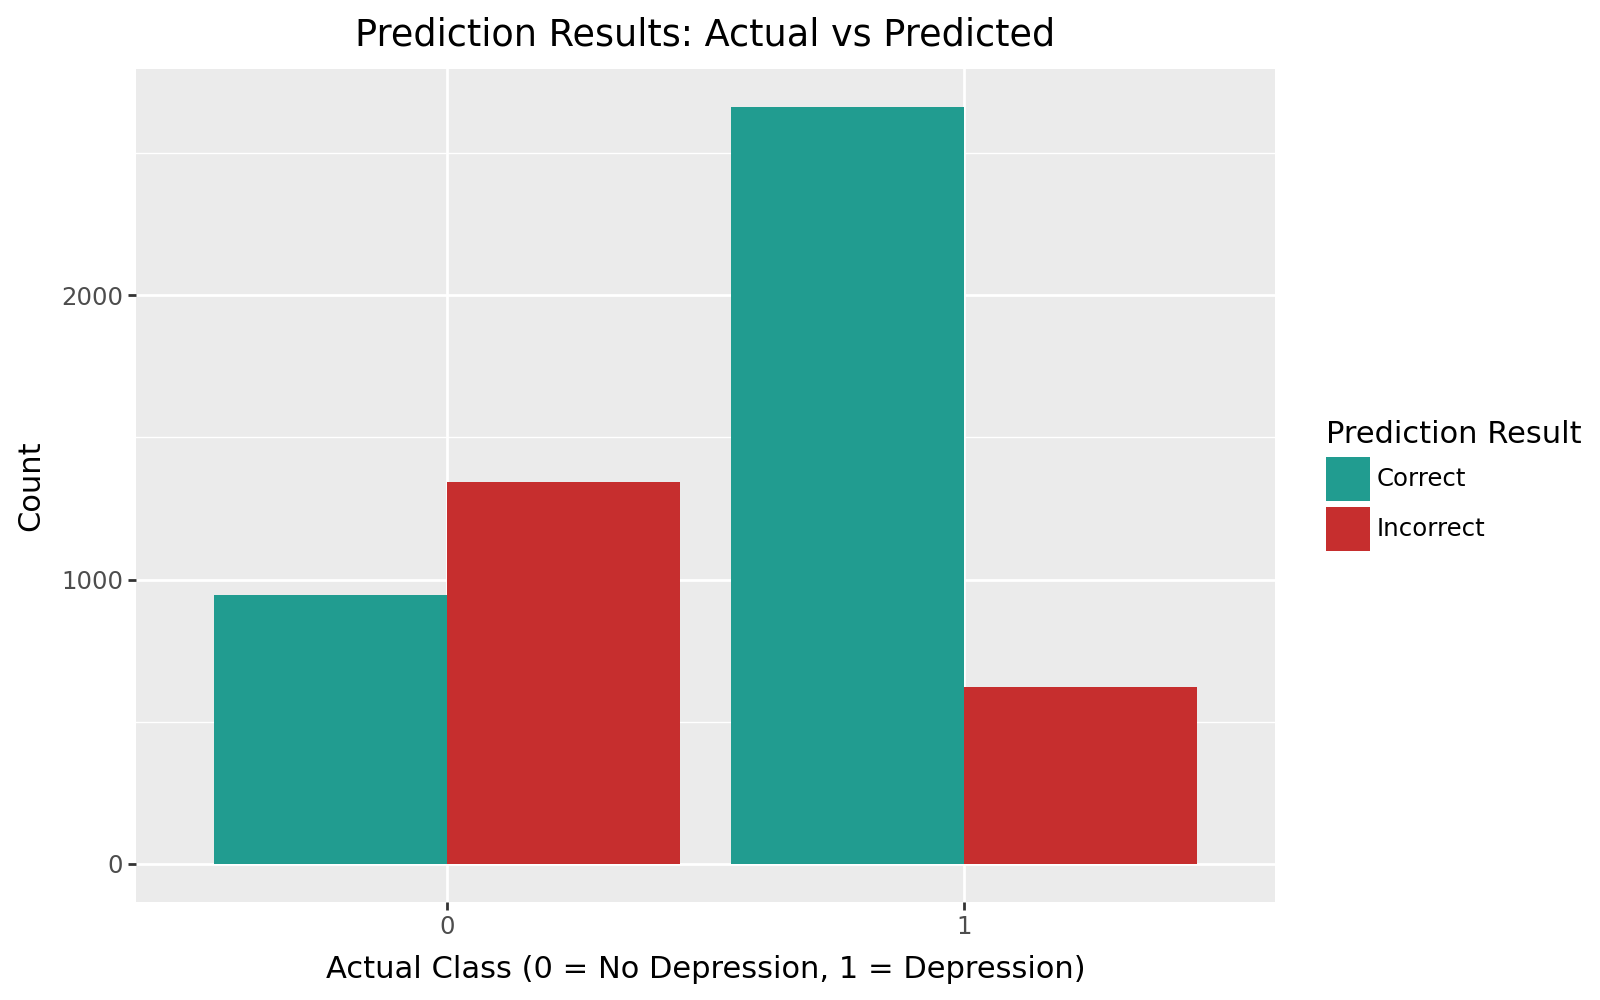

In [ ]:
df_prediction = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Create 'Result' column
df_prediction['Result'] = df_prediction.apply(
    lambda row: 'Correct' if row['Actual'] == row['Predicted'] else 'Incorrect',
    axis=1
)

prediction_plot = df_prediction.groupby(['Actual', 'Predicted', 'Result']).size().reset_index(name='count')

# Bar Plot
bar_plot = (ggplot(prediction_plot, aes(x='factor(Actual)', y='count', fill='Result')) +
     geom_bar(stat='identity', position='dodge') +
      scale_fill_manual(values=['#219C90', '#C62E2E']) +
     labs(title='Prediction Results: Actual vs Predicted',
          x='Actual Class (0 = No Depression, 1 = Depression)',
          y='Count',
          fill='Prediction Result') +
     theme(figure_size=(8, 5)))
bar_plot

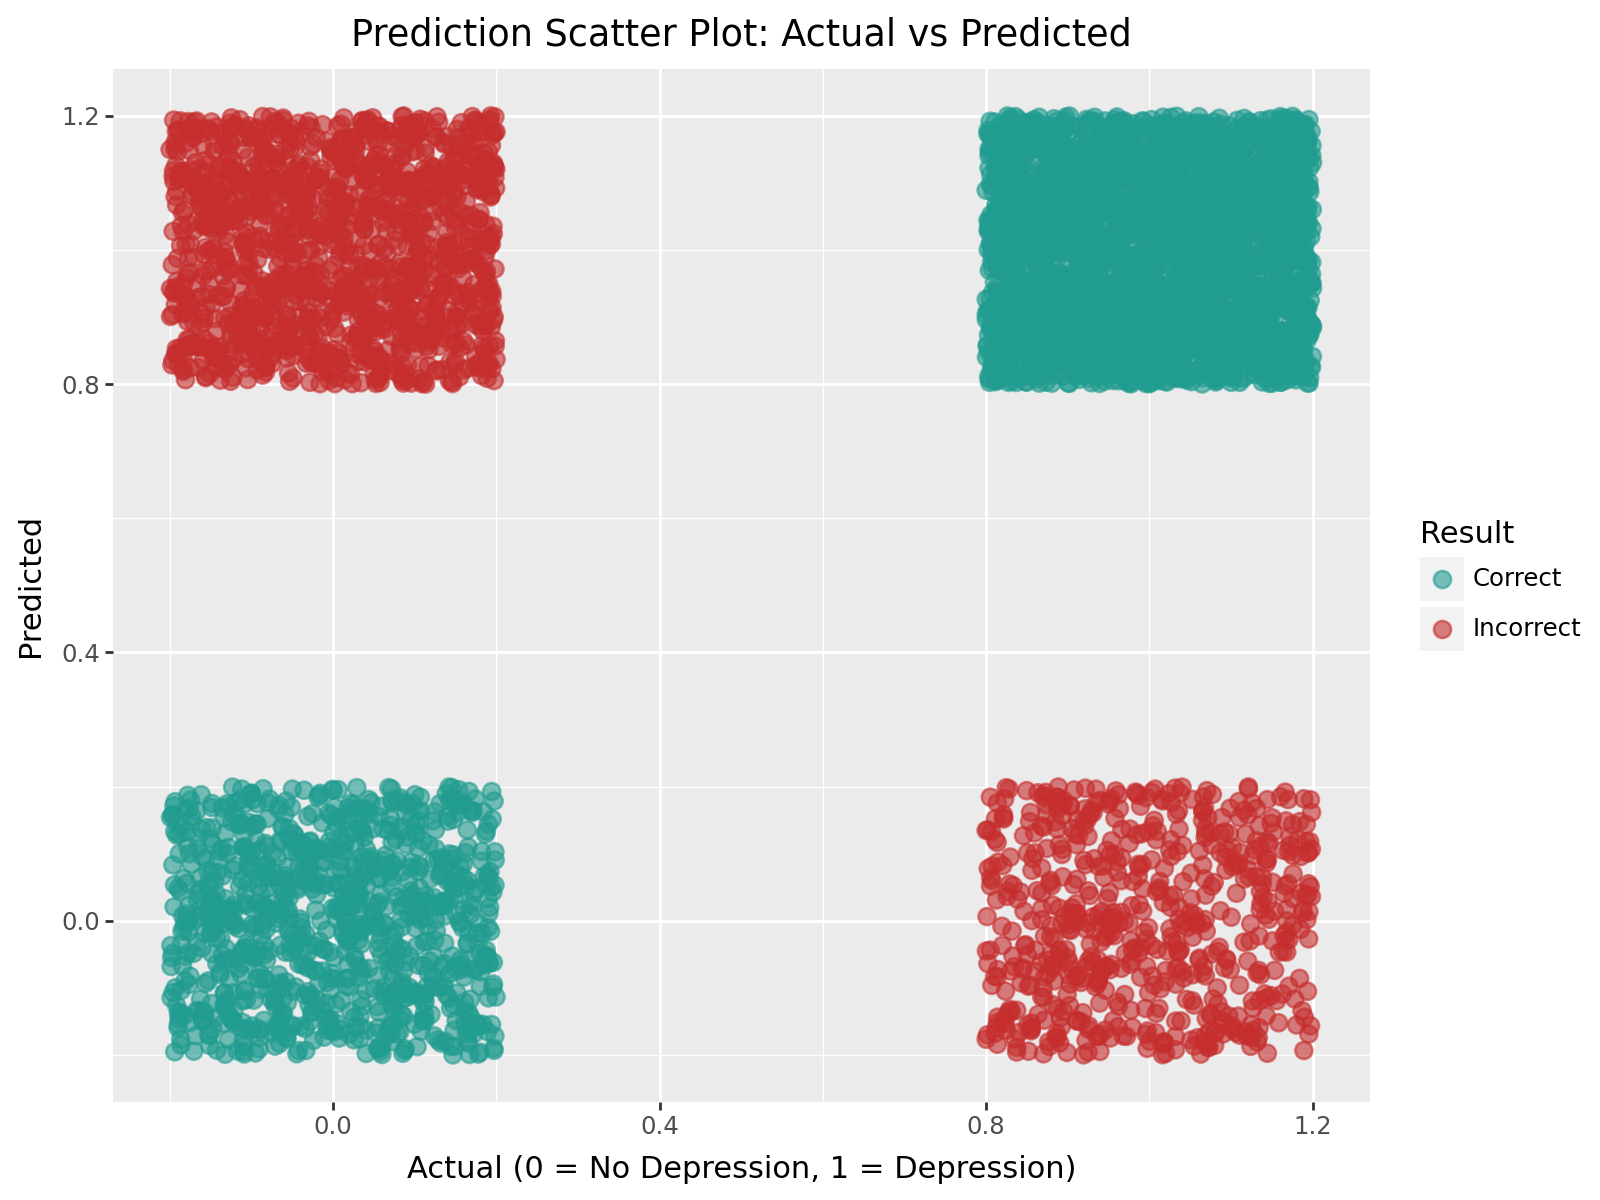

In [ ]:

# Create Column 'Result' to see if prediction correct or not
df_prediction['Result'] = df_prediction.apply(lambda row: 'Correct' if row['Actual'] == row['Predicted'] else 'Incorrect', axis=1)

# Create scatter plot
scatter_plot = (ggplot(df_prediction, aes(x='Actual', y='Predicted', color='Result')) +
     geom_jitter(width=0.2, height=0.2, alpha=0.6, size=3) +
     scale_color_manual(values=['#219C90', '#C62E2E']) +
     labs(title='Prediction Scatter Plot: Actual vs Predicted',
          x='Actual (0 = No Depression, 1 = Depression)',
          y='Predicted') +
     theme(figure_size=(8, 6)))
scatter_plot